In [305]:
import pandas as pd
df = pd.read_csv('true_car_listings.csv')
df.shape
df.describe()


,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


<AxesSubplot:xlabel='Year', ylabel='Price'>

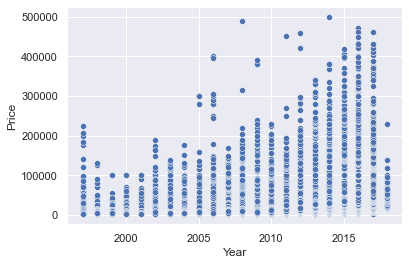

In [320]:
import seaborn as sns
sns.set()
graph = sns.scatterplot(x='Year', y='Price', data=df)
graph


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

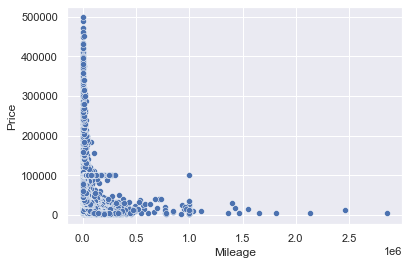

In [319]:
import seaborn as sns
sns.set()
graph = sns.scatterplot(x='Mileage', y='Price', data=df)
graph


In [308]:
#Data cleaning
from sklearn.preprocessing import LabelEncoder
categories = ['State', "City", 'Make', 'Model']

for item in categories:
    raw_data = df[item]
    encode_data = LabelEncoder().fit_transform(raw_data)
    df[item] = encode_data
df = df.drop(columns='Vin')

df.info()
df.shape
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Price    852122 non-null  int64
 1   Year     852122 non-null  int64
 2   Mileage  852122 non-null  int64
 3   City     852122 non-null  int32
 4   State    852122 non-null  int32
 5   Make     852122 non-null  int32
 6   Model    852122 non-null  int32
dtypes: int32(4), int64(3)
memory usage: 32.5 MB


<bound method NDFrame.head of         Price  Year  Mileage  City  State  Make  Model
0        8995  2014    35725   646     49     1   1194
1       10888  2013    19606  1260     39     1   1193
2        8995  2013    48851   646     49     1   1194
3       10999  2014    39922  2490      6     1   1193
4       14799  2016    22142  1231     50     1   1196
...       ...   ...      ...   ...    ...   ...    ...
852117  63215  2017        9   505      5    56   2034
852118  72260  2017     3201   677     36    56   2570
852119  55999  2016    28941   761      6    56   2564
852120  60240  2017     3005  2006      5    56   2404
852121  76995  2017     2502  1568     39    56   2571

[852122 rows x 7 columns]>

<AxesSubplot:>

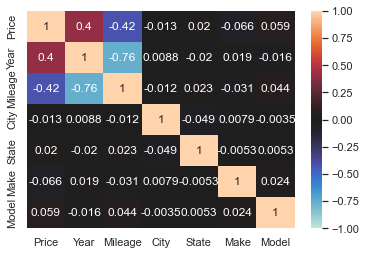

In [309]:
#Checking Correlation Visually
import seaborn as sns 
 
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) 



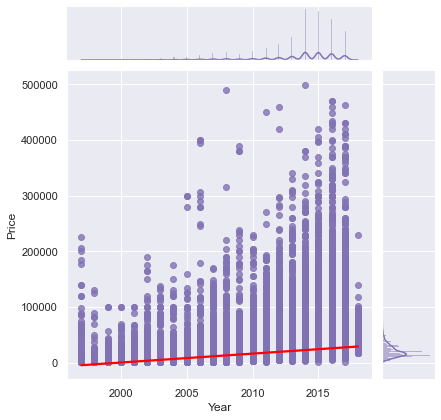

In [297]:
#plot year and mileage variables with the price.
sns.set_theme(style="darkgrid") 
sns.jointplot(x="Year", y="Price", data=df, 
	kind="reg", color="m", line_kws={'color': 'red'}) 


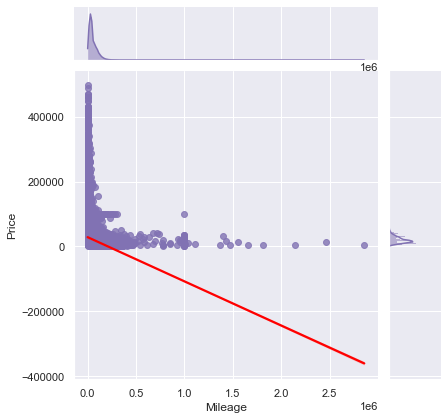

In [321]:
sns.set_theme(style="darkgrid") 
sns.jointplot(x="Mileage", y="Price", data=df, 
	kind="reg", color="m", line_kws={'color': 'red'}) 

In [310]:
#split the data for training and testing in a 80%-20%
from sklearn.model_selection import train_test_split 
 
X = df.drop(columns='Price') 
Y = df.Price 
X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, train_size=0.8, test_size=0.2, random_state=100)
y_test.shape


(170425,)

In [300]:
from sklearn import linear_model 
from sklearn.metrics import r2_score 

 
lm = linear_model.LinearRegression() 
lm.fit(X_train, y_train) 
y_pred = lm.predict(X_test) 
print(r2_score(y_true=y_test, y_pred=y_pred))
print(X_train)


0.2115731982697704
        Year  Mileage  City  State  Make  Model
655619  2012    77693    93     49    41   1544
760114  2015    17754   264     39    54    506
445261  2014    43444   142     42    22    785
768883  2015    37150   181      5    54   1726
548705  2011    96151  1166     11    27   2185
...      ...      ...   ...    ...   ...    ...
65615   2012    30579   641      5     7    795
778087  2016    48267  1148     22    54   1837
210755  2013    40755  1237      2    11    709
56088   2017     4774  1268     21     5     95
824840  2014    14166   764     11    55   1254

[681697 rows x 6 columns]


In [301]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=6542, learning_rate=0.03) 
model.fit( 
	X_train, y_train, 
	eval_set=(X_test, y_test), 
) 
print(model.score(X, Y))

0:	learn: 13533.7153597	test: 13323.4833368	best: 13323.4833368 (0)	total: 109ms	remaining: 11m 51s
1:	learn: 13426.5088674	test: 13218.6930359	best: 13218.6930359 (1)	total: 185ms	remaining: 10m 6s
2:	learn: 13324.4028892	test: 13117.6949736	best: 13117.6949736 (2)	total: 251ms	remaining: 9m 7s
3:	learn: 13226.7468990	test: 13022.2451582	best: 13022.2451582 (3)	total: 320ms	remaining: 8m 42s
4:	learn: 13134.4345528	test: 12930.7816787	best: 12930.7816787 (4)	total: 395ms	remaining: 8m 36s
5:	learn: 13050.8052982	test: 12846.6856155	best: 12846.6856155 (5)	total: 564ms	remaining: 10m 14s
6:	learn: 12970.8682672	test: 12766.8211827	best: 12766.8211827 (6)	total: 675ms	remaining: 10m 30s
7:	learn: 12886.7459369	test: 12684.7111154	best: 12684.7111154 (7)	total: 768ms	remaining: 10m 27s
8:	learn: 12808.1805919	test: 12607.1943426	best: 12607.1943426 (8)	total: 852ms	remaining: 10m 18s
9:	learn: 12733.0167842	test: 12536.3056166	best: 12536.3056166 (9)	total: 926ms	remaining: 10m 5s
10:	le

83:	learn: 10407.9932689	test: 10212.8043449	best: 10212.8043449 (83)	total: 7.13s	remaining: 9m 8s
84:	learn: 10388.1099857	test: 10192.5890896	best: 10192.5890896 (84)	total: 7.21s	remaining: 9m 7s
85:	learn: 10366.7818888	test: 10170.1787384	best: 10170.1787384 (85)	total: 7.29s	remaining: 9m 7s
86:	learn: 10339.3730212	test: 10143.8973202	best: 10143.8973202 (86)	total: 7.37s	remaining: 9m 6s
87:	learn: 10319.8910510	test: 10124.0516410	best: 10124.0516410 (87)	total: 7.45s	remaining: 9m 6s
88:	learn: 10299.1390392	test: 10104.1636255	best: 10104.1636255 (88)	total: 7.52s	remaining: 9m 5s
89:	learn: 10287.7580366	test: 10095.1411561	best: 10095.1411561 (89)	total: 7.6s	remaining: 9m 4s
90:	learn: 10267.8132626	test: 10074.1645183	best: 10074.1645183 (90)	total: 7.68s	remaining: 9m 4s
91:	learn: 10255.8570410	test: 10060.7114287	best: 10060.7114287 (91)	total: 7.75s	remaining: 9m 3s
92:	learn: 10244.8210019	test: 10049.6617267	best: 10049.6617267 (92)	total: 7.84s	remaining: 9m 3s
9

168:	learn: 9065.0452932	test: 8900.5964991	best: 8900.5964991 (168)	total: 14.4s	remaining: 9m 4s
169:	learn: 9052.2542534	test: 8888.7747739	best: 8888.7747739 (169)	total: 14.5s	remaining: 9m 3s
170:	learn: 9044.5618819	test: 8881.3096473	best: 8881.3096473 (170)	total: 14.6s	remaining: 9m 3s
171:	learn: 9024.0320383	test: 8864.4224921	best: 8864.4224921 (171)	total: 14.7s	remaining: 9m 3s
172:	learn: 9014.5093783	test: 8854.6759237	best: 8854.6759237 (172)	total: 14.8s	remaining: 9m 3s
173:	learn: 9002.4712635	test: 8844.5936838	best: 8844.5936838 (173)	total: 14.9s	remaining: 9m 3s
174:	learn: 8988.7702231	test: 8828.6315551	best: 8828.6315551 (174)	total: 14.9s	remaining: 9m 3s
175:	learn: 8976.6755576	test: 8813.6547605	best: 8813.6547605 (175)	total: 15s	remaining: 9m 3s
176:	learn: 8963.7367083	test: 8799.5769991	best: 8799.5769991 (176)	total: 15.1s	remaining: 9m 2s
177:	learn: 8950.2343610	test: 8785.5402331	best: 8785.5402331 (177)	total: 15.2s	remaining: 9m 3s
178:	learn: 

253:	learn: 8240.1511439	test: 8081.1718340	best: 8081.1718340 (253)	total: 21.4s	remaining: 8m 50s
254:	learn: 8235.5406593	test: 8076.4964588	best: 8076.4964588 (254)	total: 21.5s	remaining: 8m 49s
255:	learn: 8228.7385754	test: 8068.9860494	best: 8068.9860494 (255)	total: 21.6s	remaining: 8m 49s
256:	learn: 8220.5401687	test: 8060.5437687	best: 8060.5437687 (256)	total: 21.6s	remaining: 8m 49s
257:	learn: 8216.5750902	test: 8056.5015785	best: 8056.5015785 (257)	total: 21.7s	remaining: 8m 49s
258:	learn: 8208.3999296	test: 8048.1609398	best: 8048.1609398 (258)	total: 21.8s	remaining: 8m 48s
259:	learn: 8197.3607901	test: 8035.0372964	best: 8035.0372964 (259)	total: 21.9s	remaining: 8m 48s
260:	learn: 8190.8474413	test: 8029.9478945	best: 8029.9478945 (260)	total: 22s	remaining: 8m 48s
261:	learn: 8182.9793178	test: 8019.5513809	best: 8019.5513809 (261)	total: 22s	remaining: 8m 48s
262:	learn: 8176.0580999	test: 8012.4884548	best: 8012.4884548 (262)	total: 22.1s	remaining: 8m 48s
263:

336:	learn: 7765.2792168	test: 7597.1337996	best: 7597.1337996 (336)	total: 28.6s	remaining: 8m 47s
337:	learn: 7761.7843869	test: 7593.2512622	best: 7593.2512622 (337)	total: 28.7s	remaining: 8m 47s
338:	learn: 7757.4050443	test: 7588.8753933	best: 7588.8753933 (338)	total: 28.8s	remaining: 8m 47s
339:	learn: 7755.8899553	test: 7587.8641783	best: 7587.8641783 (339)	total: 29s	remaining: 8m 48s
340:	learn: 7751.7150491	test: 7583.1056135	best: 7583.1056135 (340)	total: 29.1s	remaining: 8m 48s
341:	learn: 7744.0660908	test: 7576.0703518	best: 7576.0703518 (341)	total: 29.2s	remaining: 8m 48s
342:	learn: 7740.2042706	test: 7572.2361387	best: 7572.2361387 (342)	total: 29.3s	remaining: 8m 48s
343:	learn: 7735.5830195	test: 7567.5941707	best: 7567.5941707 (343)	total: 29.3s	remaining: 8m 48s
344:	learn: 7727.6728783	test: 7561.0050480	best: 7561.0050480 (344)	total: 29.4s	remaining: 8m 48s
345:	learn: 7718.0852311	test: 7549.5567828	best: 7549.5567828 (345)	total: 29.5s	remaining: 8m 48s
34

419:	learn: 7435.4809143	test: 7273.4559101	best: 7273.4559101 (419)	total: 36.4s	remaining: 8m 49s
420:	learn: 7430.0467564	test: 7267.8696270	best: 7267.8696270 (420)	total: 36.5s	remaining: 8m 50s
421:	learn: 7427.4262698	test: 7264.9075694	best: 7264.9075694 (421)	total: 36.6s	remaining: 8m 50s
422:	learn: 7425.9187313	test: 7263.3717460	best: 7263.3717460 (422)	total: 36.7s	remaining: 8m 50s
423:	learn: 7419.7346723	test: 7258.8410534	best: 7258.8410534 (423)	total: 36.8s	remaining: 8m 50s
424:	learn: 7415.1066315	test: 7254.0041257	best: 7254.0041257 (424)	total: 36.9s	remaining: 8m 50s
425:	learn: 7410.1654590	test: 7248.9169207	best: 7248.9169207 (425)	total: 37s	remaining: 8m 50s
426:	learn: 7406.5153988	test: 7245.3268493	best: 7245.3268493 (426)	total: 37.1s	remaining: 8m 51s
427:	learn: 7402.5603048	test: 7241.4418715	best: 7241.4418715 (427)	total: 37.2s	remaining: 8m 51s
428:	learn: 7401.0226879	test: 7240.7660419	best: 7240.7660419 (428)	total: 37.3s	remaining: 8m 51s
42

502:	learn: 7145.3852463	test: 6993.4141713	best: 6993.4141713 (502)	total: 43.4s	remaining: 8m 40s
503:	learn: 7138.4298269	test: 6989.0391796	best: 6989.0391796 (503)	total: 43.5s	remaining: 8m 41s
504:	learn: 7134.0171127	test: 6986.0184543	best: 6986.0184543 (504)	total: 43.6s	remaining: 8m 41s
505:	learn: 7129.4439643	test: 6980.7022460	best: 6980.7022460 (505)	total: 43.8s	remaining: 8m 42s
506:	learn: 7124.9814717	test: 6976.6792805	best: 6976.6792805 (506)	total: 43.9s	remaining: 8m 42s
507:	learn: 7123.0731808	test: 6974.5004881	best: 6974.5004881 (507)	total: 44s	remaining: 8m 42s
508:	learn: 7118.7805822	test: 6970.9085207	best: 6970.9085207 (508)	total: 44.1s	remaining: 8m 42s
509:	learn: 7114.3367377	test: 6966.9879513	best: 6966.9879513 (509)	total: 44.1s	remaining: 8m 42s
510:	learn: 7111.1318944	test: 6964.2140657	best: 6964.2140657 (510)	total: 44.2s	remaining: 8m 41s
511:	learn: 7107.3650755	test: 6959.8333774	best: 6959.8333774 (511)	total: 44.3s	remaining: 8m 41s
51

585:	learn: 6917.6249409	test: 6782.5235968	best: 6782.5235968 (585)	total: 50.9s	remaining: 8m 36s
586:	learn: 6913.3282811	test: 6778.1899838	best: 6778.1899838 (586)	total: 51s	remaining: 8m 37s
587:	learn: 6910.6743336	test: 6775.8839079	best: 6775.8839079 (587)	total: 51s	remaining: 8m 36s
588:	learn: 6904.8180680	test: 6768.2603504	best: 6768.2603504 (588)	total: 51.1s	remaining: 8m 36s
589:	learn: 6901.8039225	test: 6765.1773800	best: 6765.1773800 (589)	total: 51.2s	remaining: 8m 36s
590:	learn: 6898.7118414	test: 6762.0283852	best: 6762.0283852 (590)	total: 51.3s	remaining: 8m 36s
591:	learn: 6895.7633283	test: 6759.0146018	best: 6759.0146018 (591)	total: 51.4s	remaining: 8m 36s
592:	learn: 6893.9333389	test: 6757.0900269	best: 6757.0900269 (592)	total: 51.5s	remaining: 8m 36s
593:	learn: 6893.1699506	test: 6756.6704820	best: 6756.6704820 (593)	total: 51.5s	remaining: 8m 36s
594:	learn: 6890.2512093	test: 6755.2606272	best: 6755.2606272 (594)	total: 51.6s	remaining: 8m 36s
595:

668:	learn: 6703.1439858	test: 6571.9174104	best: 6571.9174104 (668)	total: 58.1s	remaining: 8m 30s
669:	learn: 6701.4824604	test: 6570.3712817	best: 6570.3712817 (669)	total: 58.2s	remaining: 8m 30s
670:	learn: 6699.6429618	test: 6568.4515564	best: 6568.4515564 (670)	total: 58.3s	remaining: 8m 30s
671:	learn: 6697.1400992	test: 6566.2063568	best: 6566.2063568 (671)	total: 58.4s	remaining: 8m 30s
672:	learn: 6696.4030829	test: 6565.4138654	best: 6565.4138654 (672)	total: 58.5s	remaining: 8m 30s
673:	learn: 6693.1118331	test: 6562.1479573	best: 6562.1479573 (673)	total: 58.6s	remaining: 8m 30s
674:	learn: 6692.2629648	test: 6562.2611765	best: 6562.1479573 (673)	total: 58.7s	remaining: 8m 29s
675:	learn: 6689.5000215	test: 6559.2112735	best: 6559.2112735 (675)	total: 58.7s	remaining: 8m 29s
676:	learn: 6686.3805603	test: 6556.0181426	best: 6556.0181426 (676)	total: 58.9s	remaining: 8m 29s
677:	learn: 6684.5279680	test: 6554.0687518	best: 6554.0687518 (677)	total: 58.9s	remaining: 8m 29s


751:	learn: 6531.8687933	test: 6408.5177881	best: 6408.5177881 (751)	total: 1m 5s	remaining: 8m 21s
752:	learn: 6527.3262183	test: 6402.1470870	best: 6402.1470870 (752)	total: 1m 5s	remaining: 8m 21s
753:	learn: 6525.1826616	test: 6399.9267612	best: 6399.9267612 (753)	total: 1m 5s	remaining: 8m 21s
754:	learn: 6522.7427125	test: 6397.4957859	best: 6397.4957859 (754)	total: 1m 5s	remaining: 8m 21s
755:	learn: 6518.6228212	test: 6394.7686387	best: 6394.7686387 (755)	total: 1m 5s	remaining: 8m 21s
756:	learn: 6516.8417099	test: 6392.5914389	best: 6392.5914389 (756)	total: 1m 5s	remaining: 8m 21s
757:	learn: 6514.4233273	test: 6390.2243990	best: 6390.2243990 (757)	total: 1m 5s	remaining: 8m 20s
758:	learn: 6512.1857053	test: 6387.9543259	best: 6387.9543259 (758)	total: 1m 5s	remaining: 8m 20s
759:	learn: 6511.5191492	test: 6387.2401154	best: 6387.2401154 (759)	total: 1m 5s	remaining: 8m 20s
760:	learn: 6510.0137050	test: 6385.6568907	best: 6385.6568907 (760)	total: 1m 5s	remaining: 8m 20s


834:	learn: 6377.0456613	test: 6259.4276081	best: 6259.4276081 (834)	total: 1m 12s	remaining: 8m 17s
835:	learn: 6375.1383675	test: 6257.6495352	best: 6257.6495352 (835)	total: 1m 12s	remaining: 8m 17s
836:	learn: 6374.5688207	test: 6257.3777048	best: 6257.3777048 (836)	total: 1m 12s	remaining: 8m 16s
837:	learn: 6372.5106218	test: 6254.9084390	best: 6254.9084390 (837)	total: 1m 12s	remaining: 8m 16s
838:	learn: 6371.9071559	test: 6254.3488803	best: 6254.3488803 (838)	total: 1m 13s	remaining: 8m 16s
839:	learn: 6369.2156178	test: 6253.0084714	best: 6253.0084714 (839)	total: 1m 13s	remaining: 8m 16s
840:	learn: 6367.3097037	test: 6251.1198092	best: 6251.1198092 (840)	total: 1m 13s	remaining: 8m 16s
841:	learn: 6366.1309007	test: 6250.9393742	best: 6250.9393742 (841)	total: 1m 13s	remaining: 8m 16s
842:	learn: 6365.6240012	test: 6250.4481641	best: 6250.4481641 (842)	total: 1m 13s	remaining: 8m 16s
843:	learn: 6364.0887302	test: 6249.2358058	best: 6249.2358058 (843)	total: 1m 13s	remainin

917:	learn: 6251.5091242	test: 6142.0997775	best: 6142.0997775 (917)	total: 1m 20s	remaining: 8m 12s
918:	learn: 6249.6280537	test: 6140.2536019	best: 6140.2536019 (918)	total: 1m 20s	remaining: 8m 12s
919:	learn: 6246.9756211	test: 6138.3662462	best: 6138.3662462 (919)	total: 1m 20s	remaining: 8m 12s
920:	learn: 6244.5574665	test: 6136.0434631	best: 6136.0434631 (920)	total: 1m 20s	remaining: 8m 12s
921:	learn: 6244.0456196	test: 6135.5038514	best: 6135.5038514 (921)	total: 1m 20s	remaining: 8m 12s
922:	learn: 6243.8414689	test: 6135.2987473	best: 6135.2987473 (922)	total: 1m 20s	remaining: 8m 11s
923:	learn: 6242.2817330	test: 6133.7362846	best: 6133.7362846 (923)	total: 1m 20s	remaining: 8m 11s
924:	learn: 6240.4790592	test: 6131.8825928	best: 6131.8825928 (924)	total: 1m 20s	remaining: 8m 11s
925:	learn: 6239.8848159	test: 6131.9790513	best: 6131.8825928 (924)	total: 1m 21s	remaining: 8m 11s
926:	learn: 6237.3683499	test: 6130.2072176	best: 6130.2072176 (926)	total: 1m 21s	remainin

1001:	learn: 6128.5014669	test: 6031.1358140	best: 6031.0310455 (1000)	total: 1m 27s	remaining: 8m 4s
1002:	learn: 6126.4839240	test: 6029.4048102	best: 6029.4048102 (1002)	total: 1m 27s	remaining: 8m 4s
1003:	learn: 6125.4416480	test: 6028.2773366	best: 6028.2773366 (1003)	total: 1m 27s	remaining: 8m 3s
1004:	learn: 6124.3708301	test: 6027.0803603	best: 6027.0803603 (1004)	total: 1m 27s	remaining: 8m 3s
1005:	learn: 6123.2154982	test: 6026.1915200	best: 6026.1915200 (1005)	total: 1m 27s	remaining: 8m 3s
1006:	learn: 6122.1662382	test: 6024.9806873	best: 6024.9806873 (1006)	total: 1m 28s	remaining: 8m 4s
1007:	learn: 6120.7165069	test: 6023.6529912	best: 6023.6529912 (1007)	total: 1m 28s	remaining: 8m 4s
1008:	learn: 6119.5687301	test: 6022.4662728	best: 6022.4662728 (1008)	total: 1m 28s	remaining: 8m 4s
1009:	learn: 6118.8188472	test: 6021.7216367	best: 6021.7216367 (1009)	total: 1m 28s	remaining: 8m 4s
1010:	learn: 6116.9312720	test: 6020.1623491	best: 6020.1623491 (1010)	total: 1m 2

1082:	learn: 6034.1784644	test: 5943.7002597	best: 5943.7002597 (1082)	total: 1m 34s	remaining: 7m 54s
1083:	learn: 6033.9541444	test: 5943.4630551	best: 5943.4630551 (1083)	total: 1m 34s	remaining: 7m 54s
1084:	learn: 6033.0406434	test: 5942.5881370	best: 5942.5881370 (1084)	total: 1m 34s	remaining: 7m 54s
1085:	learn: 6032.0134500	test: 5941.5410465	best: 5941.5410465 (1085)	total: 1m 34s	remaining: 7m 54s
1086:	learn: 6031.1483667	test: 5940.7826144	best: 5940.7826144 (1086)	total: 1m 34s	remaining: 7m 54s
1087:	learn: 6030.1708241	test: 5939.8133511	best: 5939.8133511 (1087)	total: 1m 34s	remaining: 7m 54s
1088:	learn: 6029.9430571	test: 5939.6345197	best: 5939.6345197 (1088)	total: 1m 34s	remaining: 7m 53s
1089:	learn: 6028.9321593	test: 5938.6214287	best: 5938.6214287 (1089)	total: 1m 34s	remaining: 7m 53s
1090:	learn: 6028.5177096	test: 5937.9795899	best: 5937.9795899 (1090)	total: 1m 34s	remaining: 7m 53s
1091:	learn: 6027.4268559	test: 5936.7013537	best: 5936.7013537 (1091)	to

1163:	learn: 5942.8101805	test: 5860.9845246	best: 5860.9845246 (1163)	total: 1m 40s	remaining: 7m 45s
1164:	learn: 5942.4236104	test: 5860.6606981	best: 5860.6606981 (1164)	total: 1m 40s	remaining: 7m 45s
1165:	learn: 5942.0598230	test: 5860.3581272	best: 5860.3581272 (1165)	total: 1m 41s	remaining: 7m 45s
1166:	learn: 5941.3557073	test: 5859.6457795	best: 5859.6457795 (1166)	total: 1m 41s	remaining: 7m 45s
1167:	learn: 5939.9163079	test: 5858.4171518	best: 5858.4171518 (1167)	total: 1m 41s	remaining: 7m 45s
1168:	learn: 5934.3649648	test: 5853.8055962	best: 5853.8055962 (1168)	total: 1m 41s	remaining: 7m 45s
1169:	learn: 5933.6913086	test: 5852.8394961	best: 5852.8394961 (1169)	total: 1m 41s	remaining: 7m 45s
1170:	learn: 5932.2560987	test: 5850.9642282	best: 5850.9642282 (1170)	total: 1m 41s	remaining: 7m 45s
1171:	learn: 5931.0873317	test: 5850.2898806	best: 5850.2898806 (1171)	total: 1m 41s	remaining: 7m 45s
1172:	learn: 5929.9922263	test: 5849.2194548	best: 5849.2194548 (1172)	to

1243:	learn: 5870.7547962	test: 5797.8434544	best: 5797.8434544 (1243)	total: 1m 47s	remaining: 7m 35s
1244:	learn: 5869.9583226	test: 5797.0574986	best: 5797.0574986 (1244)	total: 1m 47s	remaining: 7m 35s
1245:	learn: 5869.7199148	test: 5796.9461974	best: 5796.9461974 (1245)	total: 1m 47s	remaining: 7m 35s
1246:	learn: 5869.2926731	test: 5796.4921446	best: 5796.4921446 (1246)	total: 1m 47s	remaining: 7m 35s
1247:	learn: 5868.6841144	test: 5795.9296950	best: 5795.9296950 (1247)	total: 1m 47s	remaining: 7m 35s
1248:	learn: 5867.7864445	test: 5794.9521339	best: 5794.9521339 (1248)	total: 1m 47s	remaining: 7m 35s
1249:	learn: 5866.9755854	test: 5794.1278012	best: 5794.1278012 (1249)	total: 1m 47s	remaining: 7m 35s
1250:	learn: 5866.6283467	test: 5793.8055577	best: 5793.8055577 (1250)	total: 1m 47s	remaining: 7m 34s
1251:	learn: 5865.4059650	test: 5792.8460745	best: 5792.8460745 (1251)	total: 1m 47s	remaining: 7m 34s
1252:	learn: 5864.7006814	test: 5792.7888990	best: 5792.7888990 (1252)	to

1325:	learn: 5793.5410067	test: 5727.0897602	best: 5727.0897602 (1325)	total: 1m 53s	remaining: 7m 26s
1326:	learn: 5793.3832349	test: 5726.9497825	best: 5726.9497825 (1326)	total: 1m 53s	remaining: 7m 26s
1327:	learn: 5792.3053404	test: 5726.2964398	best: 5726.2964398 (1327)	total: 1m 53s	remaining: 7m 26s
1328:	learn: 5791.7419717	test: 5725.7340403	best: 5725.7340403 (1328)	total: 1m 53s	remaining: 7m 25s
1329:	learn: 5791.5453162	test: 5725.5499360	best: 5725.5499360 (1329)	total: 1m 53s	remaining: 7m 25s
1330:	learn: 5789.0867100	test: 5722.3388001	best: 5722.3388001 (1330)	total: 1m 53s	remaining: 7m 25s
1331:	learn: 5788.6711773	test: 5721.9451908	best: 5721.9451908 (1331)	total: 1m 53s	remaining: 7m 25s
1332:	learn: 5787.9739140	test: 5721.0896990	best: 5721.0896990 (1332)	total: 1m 54s	remaining: 7m 25s
1333:	learn: 5787.8626045	test: 5721.0022519	best: 5721.0022519 (1333)	total: 1m 54s	remaining: 7m 25s
1334:	learn: 5787.0184789	test: 5720.6624824	best: 5720.6624824 (1334)	to

1406:	learn: 5728.1655620	test: 5667.6540662	best: 5667.6540662 (1406)	total: 1m 59s	remaining: 7m 17s
1407:	learn: 5727.1903226	test: 5667.4457222	best: 5667.4457222 (1407)	total: 1m 59s	remaining: 7m 16s
1408:	learn: 5727.0208903	test: 5667.2897286	best: 5667.2897286 (1408)	total: 1m 59s	remaining: 7m 16s
1409:	learn: 5726.8568206	test: 5667.1588670	best: 5667.1588670 (1409)	total: 2m	remaining: 7m 16s
1410:	learn: 5726.4181013	test: 5666.8634317	best: 5666.8634317 (1410)	total: 2m	remaining: 7m 16s
1411:	learn: 5725.8880165	test: 5666.9555166	best: 5666.8634317 (1410)	total: 2m	remaining: 7m 16s
1412:	learn: 5725.4406036	test: 5666.5560517	best: 5666.5560517 (1412)	total: 2m	remaining: 7m 16s
1413:	learn: 5724.9286916	test: 5666.6102616	best: 5666.5560517 (1412)	total: 2m	remaining: 7m 16s
1414:	learn: 5724.3911057	test: 5666.1029254	best: 5666.1029254 (1414)	total: 2m	remaining: 7m 16s
1415:	learn: 5723.3325314	test: 5665.0233525	best: 5665.0233525 (1415)	total: 2m	remaining: 7m 16

1487:	learn: 5655.1079466	test: 5600.5724895	best: 5600.5724895 (1487)	total: 2m 6s	remaining: 7m 9s
1488:	learn: 5654.8416563	test: 5600.3544255	best: 5600.3544255 (1488)	total: 2m 6s	remaining: 7m 8s
1489:	learn: 5654.4451606	test: 5600.1265413	best: 5600.1265413 (1489)	total: 2m 6s	remaining: 7m 8s
1490:	learn: 5654.1460035	test: 5599.8478085	best: 5599.8478085 (1490)	total: 2m 6s	remaining: 7m 8s
1491:	learn: 5653.7108853	test: 5599.7298782	best: 5599.7298782 (1491)	total: 2m 6s	remaining: 7m 8s
1492:	learn: 5653.3648202	test: 5599.3375773	best: 5599.3375773 (1492)	total: 2m 6s	remaining: 7m 8s
1493:	learn: 5652.6585607	test: 5598.6111293	best: 5598.6111293 (1493)	total: 2m 6s	remaining: 7m 8s
1494:	learn: 5651.9762175	test: 5597.9158298	best: 5597.9158298 (1494)	total: 2m 6s	remaining: 7m 8s
1495:	learn: 5651.3207443	test: 5597.5693918	best: 5597.5693918 (1495)	total: 2m 6s	remaining: 7m 8s
1496:	learn: 5651.1640244	test: 5597.4514827	best: 5597.4514827 (1496)	total: 2m 6s	remaini

1568:	learn: 5591.5791498	test: 5535.6064102	best: 5535.6064102 (1568)	total: 2m 12s	remaining: 7m
1569:	learn: 5591.0191242	test: 5535.1052091	best: 5535.1052091 (1569)	total: 2m 12s	remaining: 7m
1570:	learn: 5590.4959229	test: 5535.0262021	best: 5535.0262021 (1570)	total: 2m 12s	remaining: 7m
1571:	learn: 5589.9105583	test: 5534.3699211	best: 5534.3699211 (1571)	total: 2m 12s	remaining: 6m 59s
1572:	learn: 5588.8937208	test: 5533.3686142	best: 5533.3686142 (1572)	total: 2m 12s	remaining: 6m 59s
1573:	learn: 5587.7334864	test: 5532.1216671	best: 5532.1216671 (1573)	total: 2m 13s	remaining: 6m 59s
1574:	learn: 5587.2441174	test: 5531.6436420	best: 5531.6436420 (1574)	total: 2m 13s	remaining: 6m 59s
1575:	learn: 5586.0366993	test: 5530.2719913	best: 5530.2719913 (1575)	total: 2m 13s	remaining: 6m 59s
1576:	learn: 5584.6785629	test: 5528.5453169	best: 5528.5453169 (1576)	total: 2m 13s	remaining: 6m 59s
1577:	learn: 5583.8536679	test: 5527.6465390	best: 5527.6465390 (1577)	total: 2m 13s	

1650:	learn: 5535.9843466	test: 5481.3723386	best: 5481.3723386 (1650)	total: 2m 19s	remaining: 6m 51s
1651:	learn: 5535.4949285	test: 5481.3154267	best: 5481.3154267 (1651)	total: 2m 19s	remaining: 6m 51s
1652:	learn: 5533.8129219	test: 5479.2726340	best: 5479.2726340 (1652)	total: 2m 19s	remaining: 6m 51s
1653:	learn: 5533.3743734	test: 5478.7657445	best: 5478.7657445 (1653)	total: 2m 19s	remaining: 6m 51s
1654:	learn: 5528.7620722	test: 5474.2413477	best: 5474.2413477 (1654)	total: 2m 19s	remaining: 6m 51s
1655:	learn: 5528.2151274	test: 5473.6920801	best: 5473.6920801 (1655)	total: 2m 19s	remaining: 6m 51s
1656:	learn: 5527.2092608	test: 5472.5363269	best: 5472.5363269 (1656)	total: 2m 19s	remaining: 6m 51s
1657:	learn: 5526.6914287	test: 5472.0069667	best: 5472.0069667 (1657)	total: 2m 19s	remaining: 6m 51s
1658:	learn: 5526.5501158	test: 5471.8651172	best: 5471.8651172 (1658)	total: 2m 19s	remaining: 6m 50s
1659:	learn: 5526.0352327	test: 5471.3153540	best: 5471.3153540 (1659)	to

1730:	learn: 5477.5802354	test: 5424.2988927	best: 5424.2988927 (1730)	total: 2m 25s	remaining: 6m 43s
1731:	learn: 5477.2042919	test: 5423.8805473	best: 5423.8805473 (1731)	total: 2m 25s	remaining: 6m 43s
1732:	learn: 5476.7252548	test: 5423.5248639	best: 5423.5248639 (1732)	total: 2m 25s	remaining: 6m 43s
1733:	learn: 5476.3020324	test: 5423.0536824	best: 5423.0536824 (1733)	total: 2m 25s	remaining: 6m 43s
1734:	learn: 5475.8056638	test: 5422.8606888	best: 5422.8606888 (1734)	total: 2m 25s	remaining: 6m 43s
1735:	learn: 5475.2798956	test: 5422.3133309	best: 5422.3133309 (1735)	total: 2m 25s	remaining: 6m 43s
1736:	learn: 5474.8425624	test: 5421.8562418	best: 5421.8562418 (1736)	total: 2m 25s	remaining: 6m 43s
1737:	learn: 5473.8763942	test: 5421.1567814	best: 5421.1567814 (1737)	total: 2m 25s	remaining: 6m 43s
1738:	learn: 5473.7417779	test: 5420.8596031	best: 5420.8596031 (1738)	total: 2m 26s	remaining: 6m 43s
1739:	learn: 5473.4851810	test: 5420.9235211	best: 5420.8596031 (1738)	to

1811:	learn: 5434.7844522	test: 5385.2497824	best: 5385.2497824 (1811)	total: 2m 31s	remaining: 6m 36s
1812:	learn: 5434.3427864	test: 5384.7269898	best: 5384.7269898 (1812)	total: 2m 31s	remaining: 6m 36s
1813:	learn: 5433.6680069	test: 5384.1953614	best: 5384.1953614 (1813)	total: 2m 31s	remaining: 6m 35s
1814:	learn: 5433.4777686	test: 5383.9965963	best: 5383.9965963 (1814)	total: 2m 31s	remaining: 6m 35s
1815:	learn: 5433.1267315	test: 5383.9097548	best: 5383.9097548 (1815)	total: 2m 32s	remaining: 6m 35s
1816:	learn: 5430.2982452	test: 5380.9221295	best: 5380.9221295 (1816)	total: 2m 32s	remaining: 6m 35s
1817:	learn: 5429.9426843	test: 5380.5539445	best: 5380.5539445 (1817)	total: 2m 32s	remaining: 6m 35s
1818:	learn: 5429.6316382	test: 5380.2636667	best: 5380.2636667 (1818)	total: 2m 32s	remaining: 6m 35s
1819:	learn: 5428.6793382	test: 5379.5512144	best: 5379.5512144 (1819)	total: 2m 32s	remaining: 6m 35s
1820:	learn: 5428.0771352	test: 5378.9170470	best: 5378.9170470 (1820)	to

1893:	learn: 5381.8698090	test: 5335.4030387	best: 5335.4030387 (1893)	total: 2m 38s	remaining: 6m 28s
1894:	learn: 5381.4918794	test: 5335.1493946	best: 5335.1493946 (1894)	total: 2m 38s	remaining: 6m 28s
1895:	learn: 5380.7976337	test: 5334.4184840	best: 5334.4184840 (1895)	total: 2m 38s	remaining: 6m 28s
1896:	learn: 5380.3679292	test: 5333.9137502	best: 5333.9137502 (1896)	total: 2m 38s	remaining: 6m 28s
1897:	learn: 5379.8667102	test: 5333.4137520	best: 5333.4137520 (1897)	total: 2m 38s	remaining: 6m 27s
1898:	learn: 5379.7862937	test: 5333.3725064	best: 5333.3725064 (1898)	total: 2m 38s	remaining: 6m 27s
1899:	learn: 5379.3444378	test: 5332.8922058	best: 5332.8922058 (1899)	total: 2m 38s	remaining: 6m 27s
1900:	learn: 5378.4383054	test: 5331.8822458	best: 5331.8822458 (1900)	total: 2m 38s	remaining: 6m 27s
1901:	learn: 5377.9277122	test: 5331.4627402	best: 5331.4627402 (1901)	total: 2m 38s	remaining: 6m 27s
1902:	learn: 5377.6909628	test: 5331.4924851	best: 5331.4627402 (1901)	to

1975:	learn: 5339.2824545	test: 5298.9295106	best: 5298.9295106 (1975)	total: 2m 44s	remaining: 6m 20s
1976:	learn: 5339.1031265	test: 5298.7386816	best: 5298.7386816 (1976)	total: 2m 44s	remaining: 6m 20s
1977:	learn: 5338.7919184	test: 5298.4268550	best: 5298.4268550 (1977)	total: 2m 44s	remaining: 6m 20s
1978:	learn: 5338.3804748	test: 5298.0154634	best: 5298.0154634 (1978)	total: 2m 44s	remaining: 6m 19s
1979:	learn: 5338.2394926	test: 5297.8668686	best: 5297.8668686 (1979)	total: 2m 44s	remaining: 6m 19s
1980:	learn: 5337.9842984	test: 5297.6081669	best: 5297.6081669 (1980)	total: 2m 44s	remaining: 6m 19s
1981:	learn: 5337.8541248	test: 5297.5848316	best: 5297.5848316 (1981)	total: 2m 44s	remaining: 6m 19s
1982:	learn: 5337.7708027	test: 5297.4359980	best: 5297.4359980 (1982)	total: 2m 45s	remaining: 6m 19s
1983:	learn: 5337.3308469	test: 5296.8759214	best: 5296.8759214 (1983)	total: 2m 45s	remaining: 6m 19s
1984:	learn: 5336.1833436	test: 5296.4248483	best: 5296.4248483 (1984)	to

2056:	learn: 5300.7585323	test: 5264.7036686	best: 5264.7036686 (2056)	total: 2m 50s	remaining: 6m 12s
2057:	learn: 5300.5504266	test: 5264.5139195	best: 5264.5139195 (2057)	total: 2m 50s	remaining: 6m 12s
2058:	learn: 5300.3507395	test: 5264.3107628	best: 5264.3107628 (2058)	total: 2m 50s	remaining: 6m 12s
2059:	learn: 5300.1682563	test: 5264.1126111	best: 5264.1126111 (2059)	total: 2m 51s	remaining: 6m 12s
2060:	learn: 5299.5558526	test: 5263.4421444	best: 5263.4421444 (2060)	total: 2m 51s	remaining: 6m 12s
2061:	learn: 5299.4769321	test: 5263.4034599	best: 5263.4034599 (2061)	total: 2m 51s	remaining: 6m 11s
2062:	learn: 5299.3344032	test: 5263.1280393	best: 5263.1280393 (2062)	total: 2m 51s	remaining: 6m 11s
2063:	learn: 5298.9476641	test: 5262.8045620	best: 5262.8045620 (2063)	total: 2m 51s	remaining: 6m 11s
2064:	learn: 5298.3609467	test: 5262.1989483	best: 5262.1989483 (2064)	total: 2m 51s	remaining: 6m 11s
2065:	learn: 5298.0873140	test: 5261.8913400	best: 5261.8913400 (2065)	to

2137:	learn: 5268.2481956	test: 5234.5869523	best: 5234.5869523 (2137)	total: 2m 57s	remaining: 6m 4s
2138:	learn: 5268.0073101	test: 5234.3589528	best: 5234.3589528 (2138)	total: 2m 57s	remaining: 6m 4s
2139:	learn: 5267.5898882	test: 5233.9695170	best: 5233.9695170 (2139)	total: 2m 57s	remaining: 6m 4s
2140:	learn: 5267.1631932	test: 5233.6953879	best: 5233.6953879 (2140)	total: 2m 57s	remaining: 6m 4s
2141:	learn: 5266.9995481	test: 5233.5815163	best: 5233.5815163 (2141)	total: 2m 57s	remaining: 6m 4s
2142:	learn: 5266.8700637	test: 5233.4351398	best: 5233.4351398 (2142)	total: 2m 57s	remaining: 6m 4s
2143:	learn: 5266.7706109	test: 5233.4942782	best: 5233.4351398 (2142)	total: 2m 57s	remaining: 6m 4s
2144:	learn: 5266.6293685	test: 5233.4353559	best: 5233.4351398 (2142)	total: 2m 57s	remaining: 6m 4s
2145:	learn: 5266.2164896	test: 5233.0564757	best: 5233.0564757 (2145)	total: 2m 57s	remaining: 6m 4s
2146:	learn: 5266.1073090	test: 5232.9735129	best: 5232.9735129 (2146)	total: 2m 5

2221:	learn: 5238.4910712	test: 5213.3426799	best: 5213.3426799 (2221)	total: 3m 3s	remaining: 5m 56s
2222:	learn: 5238.1922257	test: 5213.2039852	best: 5213.2039852 (2222)	total: 3m 3s	remaining: 5m 56s
2223:	learn: 5238.0258110	test: 5213.0308449	best: 5213.0308449 (2223)	total: 3m 3s	remaining: 5m 56s
2224:	learn: 5237.7505975	test: 5212.7485356	best: 5212.7485356 (2224)	total: 3m 3s	remaining: 5m 56s
2225:	learn: 5237.6642746	test: 5212.7200882	best: 5212.7200882 (2225)	total: 3m 3s	remaining: 5m 56s
2226:	learn: 5237.4804791	test: 5212.5156903	best: 5212.5156903 (2226)	total: 3m 3s	remaining: 5m 56s
2227:	learn: 5237.4273750	test: 5212.4445761	best: 5212.4445761 (2227)	total: 3m 3s	remaining: 5m 56s
2228:	learn: 5236.6747202	test: 5211.7616024	best: 5211.7616024 (2228)	total: 3m 4s	remaining: 5m 56s
2229:	learn: 5236.3769297	test: 5211.4795991	best: 5211.4795991 (2229)	total: 3m 4s	remaining: 5m 56s
2230:	learn: 5235.8355255	test: 5211.0443054	best: 5211.0443054 (2230)	total: 3m 4

2303:	learn: 5203.9370792	test: 5182.0463068	best: 5182.0463068 (2303)	total: 3m 9s	remaining: 5m 49s
2304:	learn: 5203.3106264	test: 5181.3515729	best: 5181.3515729 (2304)	total: 3m 9s	remaining: 5m 49s
2305:	learn: 5202.9593580	test: 5180.9856397	best: 5180.9856397 (2305)	total: 3m 10s	remaining: 5m 49s
2306:	learn: 5202.6608798	test: 5180.7157979	best: 5180.7157979 (2306)	total: 3m 10s	remaining: 5m 48s
2307:	learn: 5202.5594469	test: 5180.6274009	best: 5180.6274009 (2307)	total: 3m 10s	remaining: 5m 48s
2308:	learn: 5201.7759547	test: 5179.8312999	best: 5179.8312999 (2308)	total: 3m 10s	remaining: 5m 48s
2309:	learn: 5201.5904419	test: 5179.6641127	best: 5179.6641127 (2309)	total: 3m 10s	remaining: 5m 48s
2310:	learn: 5201.5037603	test: 5179.6199152	best: 5179.6199152 (2310)	total: 3m 10s	remaining: 5m 48s
2311:	learn: 5201.4153146	test: 5179.5645964	best: 5179.5645964 (2311)	total: 3m 10s	remaining: 5m 48s
2312:	learn: 5201.2538463	test: 5179.3984182	best: 5179.3984182 (2312)	tota

2383:	learn: 5177.2302133	test: 5156.3277413	best: 5156.3277413 (2383)	total: 3m 15s	remaining: 5m 41s
2384:	learn: 5176.6680018	test: 5155.7563649	best: 5155.7563649 (2384)	total: 3m 16s	remaining: 5m 41s
2385:	learn: 5176.4706394	test: 5155.5731027	best: 5155.5731027 (2385)	total: 3m 16s	remaining: 5m 41s
2386:	learn: 5176.3934904	test: 5155.4994669	best: 5155.4994669 (2386)	total: 3m 16s	remaining: 5m 41s
2387:	learn: 5175.7259931	test: 5154.7104246	best: 5154.7104246 (2387)	total: 3m 16s	remaining: 5m 41s
2388:	learn: 5175.5425515	test: 5154.5527878	best: 5154.5527878 (2388)	total: 3m 16s	remaining: 5m 41s
2389:	learn: 5175.2391136	test: 5154.2627062	best: 5154.2627062 (2389)	total: 3m 16s	remaining: 5m 41s
2390:	learn: 5174.6940052	test: 5153.7130989	best: 5153.7130989 (2390)	total: 3m 16s	remaining: 5m 41s
2391:	learn: 5174.4546689	test: 5153.5256909	best: 5153.5256909 (2391)	total: 3m 16s	remaining: 5m 41s
2392:	learn: 5174.1095068	test: 5153.2069252	best: 5153.2069252 (2392)	to

2464:	learn: 5147.0737123	test: 5129.8299083	best: 5129.8299083 (2464)	total: 3m 22s	remaining: 5m 34s
2465:	learn: 5146.4455315	test: 5129.2212823	best: 5129.2212823 (2465)	total: 3m 22s	remaining: 5m 34s
2466:	learn: 5146.2851332	test: 5129.0884365	best: 5129.0884365 (2466)	total: 3m 22s	remaining: 5m 34s
2467:	learn: 5146.1020208	test: 5128.9105304	best: 5128.9105304 (2467)	total: 3m 22s	remaining: 5m 34s
2468:	learn: 5145.8080269	test: 5128.6296304	best: 5128.6296304 (2468)	total: 3m 22s	remaining: 5m 34s
2469:	learn: 5145.6283697	test: 5128.5364169	best: 5128.5364169 (2469)	total: 3m 22s	remaining: 5m 34s
2470:	learn: 5145.3370476	test: 5128.2340690	best: 5128.2340690 (2470)	total: 3m 22s	remaining: 5m 33s
2471:	learn: 5145.0717618	test: 5127.9966280	best: 5127.9966280 (2471)	total: 3m 22s	remaining: 5m 33s
2472:	learn: 5144.9669366	test: 5127.9137178	best: 5127.9137178 (2472)	total: 3m 22s	remaining: 5m 33s
2473:	learn: 5144.7037484	test: 5128.0605998	best: 5127.9137178 (2472)	to

2546:	learn: 5123.4057575	test: 5107.8162068	best: 5107.8162068 (2546)	total: 3m 29s	remaining: 5m 27s
2547:	learn: 5123.2301148	test: 5107.6509385	best: 5107.6509385 (2547)	total: 3m 29s	remaining: 5m 27s
2548:	learn: 5122.8405061	test: 5107.4461098	best: 5107.4461098 (2548)	total: 3m 29s	remaining: 5m 27s
2549:	learn: 5122.4345742	test: 5107.0521448	best: 5107.0521448 (2549)	total: 3m 29s	remaining: 5m 27s
2550:	learn: 5121.8498903	test: 5106.9232207	best: 5106.9232207 (2550)	total: 3m 29s	remaining: 5m 27s
2551:	learn: 5121.6317525	test: 5106.6958026	best: 5106.6958026 (2551)	total: 3m 29s	remaining: 5m 27s
2552:	learn: 5121.2228462	test: 5106.2707429	best: 5106.2707429 (2552)	total: 3m 29s	remaining: 5m 27s
2553:	learn: 5121.0160740	test: 5106.0809480	best: 5106.0809480 (2553)	total: 3m 29s	remaining: 5m 27s
2554:	learn: 5120.9465307	test: 5106.0150187	best: 5106.0150187 (2554)	total: 3m 29s	remaining: 5m 27s
2555:	learn: 5120.8299720	test: 5105.9974955	best: 5105.9974955 (2555)	to

2626:	learn: 5103.0980440	test: 5092.4056423	best: 5092.4056423 (2626)	total: 3m 35s	remaining: 5m 21s
2627:	learn: 5102.9189400	test: 5092.2901812	best: 5092.2901812 (2627)	total: 3m 35s	remaining: 5m 21s
2628:	learn: 5102.6059810	test: 5092.1418949	best: 5092.1418949 (2628)	total: 3m 35s	remaining: 5m 21s
2629:	learn: 5102.2385781	test: 5091.7647693	best: 5091.7647693 (2629)	total: 3m 35s	remaining: 5m 20s
2630:	learn: 5102.1701510	test: 5091.7462501	best: 5091.7462501 (2630)	total: 3m 35s	remaining: 5m 20s
2631:	learn: 5101.9064079	test: 5091.4881468	best: 5091.4881468 (2631)	total: 3m 35s	remaining: 5m 20s
2632:	learn: 5101.7792549	test: 5091.4124100	best: 5091.4124100 (2632)	total: 3m 35s	remaining: 5m 20s
2633:	learn: 5101.2577381	test: 5090.6105078	best: 5090.6105078 (2633)	total: 3m 36s	remaining: 5m 20s
2634:	learn: 5101.1410620	test: 5090.4976723	best: 5090.4976723 (2634)	total: 3m 36s	remaining: 5m 20s
2635:	learn: 5100.8639586	test: 5090.1942246	best: 5090.1942246 (2635)	to

2708:	learn: 5078.7182747	test: 5071.8820934	best: 5071.8820934 (2708)	total: 3m 41s	remaining: 5m 13s
2709:	learn: 5078.2336058	test: 5071.0678476	best: 5071.0678476 (2709)	total: 3m 41s	remaining: 5m 13s
2710:	learn: 5078.0422932	test: 5070.8443959	best: 5070.8443959 (2710)	total: 3m 41s	remaining: 5m 13s
2711:	learn: 5077.8067123	test: 5070.6588369	best: 5070.6588369 (2711)	total: 3m 41s	remaining: 5m 13s
2712:	learn: 5077.3327414	test: 5070.1616801	best: 5070.1616801 (2712)	total: 3m 42s	remaining: 5m 13s
2713:	learn: 5077.2552508	test: 5070.1169549	best: 5070.1169549 (2713)	total: 3m 42s	remaining: 5m 13s
2714:	learn: 5076.6604253	test: 5069.4681986	best: 5069.4681986 (2714)	total: 3m 42s	remaining: 5m 13s
2715:	learn: 5076.4629648	test: 5069.2520348	best: 5069.2520348 (2715)	total: 3m 42s	remaining: 5m 13s
2716:	learn: 5076.3603206	test: 5069.2385245	best: 5069.2385245 (2716)	total: 3m 42s	remaining: 5m 13s
2717:	learn: 5076.1682357	test: 5068.9936564	best: 5068.9936564 (2717)	to

2788:	learn: 5052.6193414	test: 5049.2443835	best: 5049.2443835 (2788)	total: 3m 47s	remaining: 5m 6s
2789:	learn: 5052.1828748	test: 5048.9286370	best: 5048.9286370 (2789)	total: 3m 48s	remaining: 5m 6s
2790:	learn: 5052.1570349	test: 5048.8970455	best: 5048.8970455 (2790)	total: 3m 48s	remaining: 5m 6s
2791:	learn: 5051.8447107	test: 5048.5965409	best: 5048.5965409 (2791)	total: 3m 48s	remaining: 5m 6s
2792:	learn: 5050.4781622	test: 5047.5834477	best: 5047.5834477 (2792)	total: 3m 48s	remaining: 5m 6s
2793:	learn: 5049.9335764	test: 5046.7304836	best: 5046.7304836 (2793)	total: 3m 48s	remaining: 5m 6s
2794:	learn: 5049.6963239	test: 5046.4899177	best: 5046.4899177 (2794)	total: 3m 48s	remaining: 5m 6s
2795:	learn: 5049.5219224	test: 5046.3293464	best: 5046.3293464 (2795)	total: 3m 48s	remaining: 5m 6s
2796:	learn: 5049.3663025	test: 5046.1877350	best: 5046.1877350 (2796)	total: 3m 48s	remaining: 5m 6s
2797:	learn: 5049.3015042	test: 5046.1755809	best: 5046.1755809 (2797)	total: 3m 4

2870:	learn: 5030.7638865	test: 5029.9658784	best: 5029.9658784 (2870)	total: 3m 54s	remaining: 4m 59s
2871:	learn: 5030.5680431	test: 5029.7217359	best: 5029.7217359 (2871)	total: 3m 54s	remaining: 4m 59s
2872:	learn: 5030.3414071	test: 5029.4881172	best: 5029.4881172 (2872)	total: 3m 54s	remaining: 4m 59s
2873:	learn: 5030.0461584	test: 5029.5425620	best: 5029.4881172 (2872)	total: 3m 54s	remaining: 4m 59s
2874:	learn: 5029.8723183	test: 5029.5688559	best: 5029.4881172 (2872)	total: 3m 54s	remaining: 4m 59s
2875:	learn: 5028.7634474	test: 5028.4631334	best: 5028.4631334 (2875)	total: 3m 54s	remaining: 4m 59s
2876:	learn: 5028.5980289	test: 5028.4944792	best: 5028.4631334 (2875)	total: 3m 54s	remaining: 4m 58s
2877:	learn: 5028.4467539	test: 5028.4128864	best: 5028.4128864 (2877)	total: 3m 54s	remaining: 4m 58s
2878:	learn: 5028.1930220	test: 5028.1890008	best: 5028.1890008 (2878)	total: 3m 54s	remaining: 4m 58s
2879:	learn: 5028.0237738	test: 5028.0101299	best: 5028.0101299 (2879)	to

2951:	learn: 5007.8421750	test: 5011.6219320	best: 5011.6219320 (2951)	total: 4m	remaining: 4m 52s
2952:	learn: 5007.6375982	test: 5011.5048346	best: 5011.5048346 (2952)	total: 4m	remaining: 4m 52s
2953:	learn: 5007.5363234	test: 5011.5409482	best: 5011.5048346 (2952)	total: 4m	remaining: 4m 52s
2954:	learn: 5007.3812681	test: 5011.4075642	best: 5011.4075642 (2954)	total: 4m	remaining: 4m 52s
2955:	learn: 5007.1751833	test: 5011.2181798	best: 5011.2181798 (2955)	total: 4m	remaining: 4m 52s
2956:	learn: 5006.9218162	test: 5011.1453066	best: 5011.1453066 (2956)	total: 4m	remaining: 4m 51s
2957:	learn: 5006.6589872	test: 5010.9393177	best: 5010.9393177 (2957)	total: 4m	remaining: 4m 51s
2958:	learn: 5006.4557586	test: 5010.8250899	best: 5010.8250899 (2958)	total: 4m	remaining: 4m 51s
2959:	learn: 5006.3440866	test: 5010.7204093	best: 5010.7204093 (2959)	total: 4m 1s	remaining: 4m 51s
2960:	learn: 5006.2454300	test: 5010.6892993	best: 5010.6892993 (2960)	total: 4m 1s	remaining: 4m 51s
2961

3033:	learn: 4987.2181058	test: 4994.1916453	best: 4994.1916453 (3033)	total: 4m 6s	remaining: 4m 45s
3034:	learn: 4987.0746060	test: 4994.0931286	best: 4994.0931286 (3034)	total: 4m 6s	remaining: 4m 45s
3035:	learn: 4986.9694634	test: 4994.0280855	best: 4994.0280855 (3035)	total: 4m 6s	remaining: 4m 45s
3036:	learn: 4986.5509340	test: 4994.1824014	best: 4994.0280855 (3035)	total: 4m 6s	remaining: 4m 44s
3037:	learn: 4986.3180676	test: 4994.1901132	best: 4994.0280855 (3035)	total: 4m 7s	remaining: 4m 44s
3038:	learn: 4986.3020946	test: 4994.1760339	best: 4994.0280855 (3035)	total: 4m 7s	remaining: 4m 44s
3039:	learn: 4985.9917191	test: 4994.1363528	best: 4994.0280855 (3035)	total: 4m 7s	remaining: 4m 44s
3040:	learn: 4985.9332918	test: 4994.0338826	best: 4994.0280855 (3035)	total: 4m 7s	remaining: 4m 44s
3041:	learn: 4985.7560201	test: 4993.9037108	best: 4993.9037108 (3041)	total: 4m 7s	remaining: 4m 44s
3042:	learn: 4985.4552189	test: 4993.6691527	best: 4993.6691527 (3042)	total: 4m 7

3114:	learn: 4972.9213019	test: 4984.9047509	best: 4984.8446079 (3112)	total: 4m 12s	remaining: 4m 38s
3115:	learn: 4972.8482289	test: 4984.8795154	best: 4984.8446079 (3112)	total: 4m 12s	remaining: 4m 38s
3116:	learn: 4972.7548027	test: 4984.7890448	best: 4984.7890448 (3116)	total: 4m 12s	remaining: 4m 37s
3117:	learn: 4972.6626150	test: 4984.6943493	best: 4984.6943493 (3117)	total: 4m 13s	remaining: 4m 37s
3118:	learn: 4972.4644134	test: 4984.5889638	best: 4984.5889638 (3118)	total: 4m 13s	remaining: 4m 37s
3119:	learn: 4972.3410949	test: 4984.4807492	best: 4984.4807492 (3119)	total: 4m 13s	remaining: 4m 37s
3120:	learn: 4972.2159023	test: 4984.3625531	best: 4984.3625531 (3120)	total: 4m 13s	remaining: 4m 37s
3121:	learn: 4971.9211122	test: 4984.2076501	best: 4984.2076501 (3121)	total: 4m 13s	remaining: 4m 37s
3122:	learn: 4971.6893227	test: 4984.1032052	best: 4984.1032052 (3122)	total: 4m 13s	remaining: 4m 37s
3123:	learn: 4971.5396715	test: 4983.9634388	best: 4983.9634388 (3123)	to

3195:	learn: 4954.8645103	test: 4971.0387826	best: 4971.0387826 (3195)	total: 4m 19s	remaining: 4m 31s
3196:	learn: 4954.7819271	test: 4970.9774481	best: 4970.9774481 (3196)	total: 4m 19s	remaining: 4m 31s
3197:	learn: 4954.7023257	test: 4970.8903976	best: 4970.8903976 (3197)	total: 4m 19s	remaining: 4m 31s
3198:	learn: 4954.5144809	test: 4970.7026532	best: 4970.7026532 (3198)	total: 4m 19s	remaining: 4m 30s
3199:	learn: 4954.1862463	test: 4970.3939144	best: 4970.3939144 (3199)	total: 4m 19s	remaining: 4m 30s
3200:	learn: 4954.0907658	test: 4970.3400037	best: 4970.3400037 (3200)	total: 4m 19s	remaining: 4m 30s
3201:	learn: 4953.9008439	test: 4970.0950787	best: 4970.0950787 (3201)	total: 4m 19s	remaining: 4m 30s
3202:	learn: 4953.1627207	test: 4969.5744812	best: 4969.5744812 (3202)	total: 4m 19s	remaining: 4m 30s
3203:	learn: 4952.7299941	test: 4969.2210216	best: 4969.2210216 (3203)	total: 4m 19s	remaining: 4m 30s
3204:	learn: 4952.3863713	test: 4968.8647435	best: 4968.8647435 (3204)	to

3277:	learn: 4938.7294218	test: 4958.3918880	best: 4958.3918880 (3277)	total: 4m 25s	remaining: 4m 24s
3278:	learn: 4938.6718275	test: 4958.3409396	best: 4958.3409396 (3278)	total: 4m 25s	remaining: 4m 24s
3279:	learn: 4938.5644839	test: 4958.2487930	best: 4958.2487930 (3279)	total: 4m 25s	remaining: 4m 24s
3280:	learn: 4938.4947497	test: 4958.2309619	best: 4958.2309619 (3280)	total: 4m 25s	remaining: 4m 24s
3281:	learn: 4938.3805906	test: 4958.1181064	best: 4958.1181064 (3281)	total: 4m 25s	remaining: 4m 24s
3282:	learn: 4938.3033408	test: 4958.0363261	best: 4958.0363261 (3282)	total: 4m 26s	remaining: 4m 24s
3283:	learn: 4938.0443699	test: 4957.9483732	best: 4957.9483732 (3283)	total: 4m 26s	remaining: 4m 24s
3284:	learn: 4937.5245715	test: 4958.0912291	best: 4957.9483732 (3283)	total: 4m 26s	remaining: 4m 23s
3285:	learn: 4937.2142723	test: 4957.8179681	best: 4957.8179681 (3285)	total: 4m 26s	remaining: 4m 23s
3286:	learn: 4937.0838072	test: 4957.7070783	best: 4957.7070783 (3286)	to

3357:	learn: 4923.7381532	test: 4947.6852471	best: 4947.6509950 (3356)	total: 4m 31s	remaining: 4m 17s
3358:	learn: 4923.4934019	test: 4947.5047196	best: 4947.5047196 (3358)	total: 4m 31s	remaining: 4m 17s
3359:	learn: 4923.4245468	test: 4947.4562852	best: 4947.4562852 (3359)	total: 4m 32s	remaining: 4m 17s
3360:	learn: 4923.3177346	test: 4947.3508843	best: 4947.3508843 (3360)	total: 4m 32s	remaining: 4m 17s
3361:	learn: 4923.1244819	test: 4947.1757307	best: 4947.1757307 (3361)	total: 4m 32s	remaining: 4m 17s
3362:	learn: 4922.7451041	test: 4946.8100754	best: 4946.8100754 (3362)	total: 4m 32s	remaining: 4m 17s
3363:	learn: 4922.6473915	test: 4946.7554327	best: 4946.7554327 (3363)	total: 4m 32s	remaining: 4m 17s
3364:	learn: 4922.5292205	test: 4946.6332369	best: 4946.6332369 (3364)	total: 4m 32s	remaining: 4m 17s
3365:	learn: 4920.9662648	test: 4944.8960689	best: 4944.8960689 (3365)	total: 4m 32s	remaining: 4m 17s
3366:	learn: 4920.8759110	test: 4944.8061253	best: 4944.8061253 (3366)	to

3438:	learn: 4909.1609299	test: 4936.2652760	best: 4936.2173790 (3437)	total: 4m 38s	remaining: 4m 10s
3439:	learn: 4908.5935678	test: 4935.7161354	best: 4935.7161354 (3439)	total: 4m 38s	remaining: 4m 10s
3440:	learn: 4908.5464214	test: 4935.7158246	best: 4935.7158246 (3440)	total: 4m 38s	remaining: 4m 10s
3441:	learn: 4907.5184700	test: 4934.9175824	best: 4934.9175824 (3441)	total: 4m 38s	remaining: 4m 10s
3442:	learn: 4907.2240799	test: 4934.6541748	best: 4934.6541748 (3442)	total: 4m 38s	remaining: 4m 10s
3443:	learn: 4907.1194198	test: 4934.6168301	best: 4934.6168301 (3443)	total: 4m 38s	remaining: 4m 10s
3444:	learn: 4907.0699636	test: 4934.5629612	best: 4934.5629612 (3444)	total: 4m 38s	remaining: 4m 10s
3445:	learn: 4906.7475345	test: 4934.5798828	best: 4934.5629612 (3444)	total: 4m 38s	remaining: 4m 10s
3446:	learn: 4906.5630218	test: 4934.5842636	best: 4934.5629612 (3444)	total: 4m 38s	remaining: 4m 10s
3447:	learn: 4906.3328688	test: 4934.3947001	best: 4934.3947001 (3447)	to

3521:	learn: 4892.8928918	test: 4924.1905356	best: 4924.1905356 (3521)	total: 4m 44s	remaining: 4m 3s
3522:	learn: 4892.7454884	test: 4923.9792253	best: 4923.9792253 (3522)	total: 4m 44s	remaining: 4m 3s
3523:	learn: 4892.6558878	test: 4923.8872752	best: 4923.8872752 (3523)	total: 4m 44s	remaining: 4m 3s
3524:	learn: 4892.5430411	test: 4923.7870380	best: 4923.7870380 (3524)	total: 4m 44s	remaining: 4m 3s
3525:	learn: 4892.4318097	test: 4923.6950502	best: 4923.6950502 (3525)	total: 4m 44s	remaining: 4m 3s
3526:	learn: 4892.3706112	test: 4923.6535410	best: 4923.6535410 (3526)	total: 4m 44s	remaining: 4m 3s
3527:	learn: 4891.9690551	test: 4923.3622917	best: 4923.3622917 (3527)	total: 4m 44s	remaining: 4m 3s
3528:	learn: 4891.9169058	test: 4923.4014527	best: 4923.3622917 (3527)	total: 4m 44s	remaining: 4m 3s
3529:	learn: 4891.5889717	test: 4923.2766464	best: 4923.2766464 (3529)	total: 4m 44s	remaining: 4m 3s
3530:	learn: 4891.5146961	test: 4923.2539481	best: 4923.2539481 (3530)	total: 4m 4

3603:	learn: 4876.0089276	test: 4911.1625606	best: 4911.1625606 (3603)	total: 4m 50s	remaining: 3m 56s
3604:	learn: 4875.8427738	test: 4911.0137152	best: 4911.0137152 (3604)	total: 4m 50s	remaining: 3m 56s
3605:	learn: 4875.6069619	test: 4910.8100746	best: 4910.8100746 (3605)	total: 4m 50s	remaining: 3m 56s
3606:	learn: 4875.4348725	test: 4910.6419021	best: 4910.6419021 (3606)	total: 4m 50s	remaining: 3m 56s
3607:	learn: 4875.3745422	test: 4910.6388245	best: 4910.6388245 (3607)	total: 4m 50s	remaining: 3m 56s
3608:	learn: 4875.2642900	test: 4910.6405872	best: 4910.6388245 (3607)	total: 4m 51s	remaining: 3m 56s
3609:	learn: 4875.0420203	test: 4910.4167320	best: 4910.4167320 (3609)	total: 4m 51s	remaining: 3m 56s
3610:	learn: 4874.9188043	test: 4910.2823847	best: 4910.2823847 (3610)	total: 4m 51s	remaining: 3m 56s
3611:	learn: 4874.6087816	test: 4909.9179009	best: 4909.9179009 (3611)	total: 4m 51s	remaining: 3m 56s
3612:	learn: 4874.2375639	test: 4909.6493818	best: 4909.6493818 (3612)	to

3683:	learn: 4860.3062288	test: 4899.3022119	best: 4899.3022119 (3683)	total: 4m 56s	remaining: 3m 50s
3684:	learn: 4860.2567201	test: 4899.3020878	best: 4899.3020878 (3684)	total: 4m 56s	remaining: 3m 50s
3685:	learn: 4860.2240262	test: 4899.3220046	best: 4899.3020878 (3684)	total: 4m 56s	remaining: 3m 49s
3686:	learn: 4860.0787011	test: 4899.2499447	best: 4899.2499447 (3686)	total: 4m 56s	remaining: 3m 49s
3687:	learn: 4859.8211803	test: 4899.0406970	best: 4899.0406970 (3687)	total: 4m 56s	remaining: 3m 49s
3688:	learn: 4859.5891800	test: 4898.8957304	best: 4898.8957304 (3688)	total: 4m 57s	remaining: 3m 49s
3689:	learn: 4859.3244020	test: 4898.8666684	best: 4898.8666684 (3689)	total: 4m 57s	remaining: 3m 49s
3690:	learn: 4859.0249615	test: 4898.5562187	best: 4898.5562187 (3690)	total: 4m 57s	remaining: 3m 49s
3691:	learn: 4858.9091999	test: 4898.4535661	best: 4898.4535661 (3691)	total: 4m 57s	remaining: 3m 49s
3692:	learn: 4858.8625231	test: 4898.5026020	best: 4898.4535661 (3691)	to

3765:	learn: 4844.1070079	test: 4887.2108696	best: 4887.2108696 (3765)	total: 5m 2s	remaining: 3m 43s
3766:	learn: 4844.0036746	test: 4887.1198028	best: 4887.1198028 (3766)	total: 5m 3s	remaining: 3m 43s
3767:	learn: 4843.8927543	test: 4887.0220046	best: 4887.0220046 (3767)	total: 5m 3s	remaining: 3m 43s
3768:	learn: 4843.7953016	test: 4887.0376295	best: 4887.0220046 (3767)	total: 5m 3s	remaining: 3m 43s
3769:	learn: 4843.7309945	test: 4886.9968649	best: 4886.9968649 (3769)	total: 5m 3s	remaining: 3m 42s
3770:	learn: 4843.3463105	test: 4886.9642492	best: 4886.9642492 (3770)	total: 5m 3s	remaining: 3m 42s
3771:	learn: 4843.2793511	test: 4886.9008318	best: 4886.9008318 (3771)	total: 5m 3s	remaining: 3m 42s
3772:	learn: 4843.2323264	test: 4886.8594221	best: 4886.8594221 (3772)	total: 5m 3s	remaining: 3m 42s
3773:	learn: 4842.9223231	test: 4886.5236804	best: 4886.5236804 (3773)	total: 5m 3s	remaining: 3m 42s
3774:	learn: 4842.7267362	test: 4886.3891273	best: 4886.3891273 (3774)	total: 5m 3

3846:	learn: 4829.0629418	test: 4876.7657295	best: 4876.7657295 (3846)	total: 5m 9s	remaining: 3m 36s
3847:	learn: 4828.8525356	test: 4876.7492484	best: 4876.7492484 (3847)	total: 5m 9s	remaining: 3m 36s
3848:	learn: 4828.8113670	test: 4876.7144474	best: 4876.7144474 (3848)	total: 5m 9s	remaining: 3m 36s
3849:	learn: 4828.7000992	test: 4876.5956504	best: 4876.5956504 (3849)	total: 5m 9s	remaining: 3m 36s
3850:	learn: 4828.6593893	test: 4876.5616051	best: 4876.5616051 (3850)	total: 5m 9s	remaining: 3m 36s
3851:	learn: 4828.5630445	test: 4876.4561081	best: 4876.4561081 (3851)	total: 5m 10s	remaining: 3m 36s
3852:	learn: 4828.4813751	test: 4876.3800221	best: 4876.3800221 (3852)	total: 5m 10s	remaining: 3m 36s
3853:	learn: 4828.3864341	test: 4876.2954164	best: 4876.2954164 (3853)	total: 5m 10s	remaining: 3m 36s
3854:	learn: 4827.9335125	test: 4875.8762610	best: 4875.8762610 (3854)	total: 5m 10s	remaining: 3m 36s
3855:	learn: 4827.7681245	test: 4875.6887598	best: 4875.6887598 (3855)	total: 

3928:	learn: 4816.9460375	test: 4868.8343868	best: 4868.8286666 (3925)	total: 5m 19s	remaining: 3m 32s
3929:	learn: 4816.8713700	test: 4868.7669511	best: 4868.7669511 (3929)	total: 5m 19s	remaining: 3m 32s
3930:	learn: 4816.8175505	test: 4868.7505316	best: 4868.7505316 (3930)	total: 5m 19s	remaining: 3m 32s
3931:	learn: 4816.7077230	test: 4868.6411385	best: 4868.6411385 (3931)	total: 5m 19s	remaining: 3m 32s
3932:	learn: 4816.4906640	test: 4868.6213524	best: 4868.6213524 (3932)	total: 5m 19s	remaining: 3m 31s
3933:	learn: 4816.0941306	test: 4868.5873657	best: 4868.5873657 (3933)	total: 5m 19s	remaining: 3m 31s
3934:	learn: 4816.0359819	test: 4868.5837738	best: 4868.5837738 (3934)	total: 5m 19s	remaining: 3m 31s
3935:	learn: 4815.9911936	test: 4868.5471084	best: 4868.5471084 (3935)	total: 5m 19s	remaining: 3m 31s
3936:	learn: 4815.9018225	test: 4868.4541939	best: 4868.4541939 (3936)	total: 5m 19s	remaining: 3m 31s
3937:	learn: 4815.7033171	test: 4868.2647338	best: 4868.2647338 (3937)	to

4010:	learn: 4804.1549345	test: 4858.8146388	best: 4858.8146388 (4010)	total: 5m 28s	remaining: 3m 27s
4011:	learn: 4804.0039088	test: 4858.6801139	best: 4858.6801139 (4011)	total: 5m 28s	remaining: 3m 27s
4012:	learn: 4803.8260306	test: 4858.5755268	best: 4858.5755268 (4012)	total: 5m 28s	remaining: 3m 27s
4013:	learn: 4803.7570753	test: 4858.5388934	best: 4858.5388934 (4013)	total: 5m 28s	remaining: 3m 27s
4014:	learn: 4803.6719976	test: 4858.4679057	best: 4858.4679057 (4014)	total: 5m 28s	remaining: 3m 26s
4015:	learn: 4803.4400629	test: 4858.2488279	best: 4858.2488279 (4015)	total: 5m 28s	remaining: 3m 26s
4016:	learn: 4803.3772026	test: 4858.1879667	best: 4858.1879667 (4016)	total: 5m 29s	remaining: 3m 26s
4017:	learn: 4803.2792669	test: 4858.1991331	best: 4858.1879667 (4016)	total: 5m 29s	remaining: 3m 26s
4018:	learn: 4802.7391357	test: 4857.9341236	best: 4857.9341236 (4018)	total: 5m 29s	remaining: 3m 26s
4019:	learn: 4802.3276611	test: 4857.4995266	best: 4857.4995266 (4019)	to

4092:	learn: 4791.5099536	test: 4848.7837810	best: 4848.7837810 (4092)	total: 5m 36s	remaining: 3m 21s
4093:	learn: 4791.4523456	test: 4848.7293709	best: 4848.7293709 (4093)	total: 5m 36s	remaining: 3m 21s
4094:	learn: 4791.2421860	test: 4848.5995845	best: 4848.5995845 (4094)	total: 5m 36s	remaining: 3m 21s
4095:	learn: 4791.1743952	test: 4848.5700407	best: 4848.5700407 (4095)	total: 5m 37s	remaining: 3m 21s
4096:	learn: 4790.6955437	test: 4847.9017934	best: 4847.9017934 (4096)	total: 5m 37s	remaining: 3m 21s
4097:	learn: 4790.6005545	test: 4847.8213005	best: 4847.8213005 (4097)	total: 5m 37s	remaining: 3m 21s
4098:	learn: 4790.5058091	test: 4847.7543023	best: 4847.7543023 (4098)	total: 5m 37s	remaining: 3m 21s
4099:	learn: 4790.2905674	test: 4847.5278226	best: 4847.5278226 (4099)	total: 5m 37s	remaining: 3m 20s
4100:	learn: 4790.2447252	test: 4847.4005010	best: 4847.4005010 (4100)	total: 5m 37s	remaining: 3m 20s
4101:	learn: 4790.2108449	test: 4847.4151467	best: 4847.4005010 (4100)	to

4173:	learn: 4778.2027814	test: 4840.2218606	best: 4840.2218606 (4173)	total: 5m 44s	remaining: 3m 15s
4174:	learn: 4778.1148717	test: 4840.1169453	best: 4840.1169453 (4174)	total: 5m 44s	remaining: 3m 15s
4175:	learn: 4778.0193792	test: 4840.0217522	best: 4840.0217522 (4175)	total: 5m 44s	remaining: 3m 15s
4176:	learn: 4777.7035224	test: 4839.7824084	best: 4839.7824084 (4176)	total: 5m 44s	remaining: 3m 15s
4177:	learn: 4777.6738292	test: 4839.8004919	best: 4839.7824084 (4176)	total: 5m 44s	remaining: 3m 14s
4178:	learn: 4777.6510841	test: 4839.8275884	best: 4839.7824084 (4176)	total: 5m 44s	remaining: 3m 14s
4179:	learn: 4777.3702378	test: 4839.5383741	best: 4839.5383741 (4179)	total: 5m 44s	remaining: 3m 14s
4180:	learn: 4777.1613455	test: 4839.3358440	best: 4839.3358440 (4180)	total: 5m 45s	remaining: 3m 14s
4181:	learn: 4776.8676995	test: 4839.0235155	best: 4839.0235155 (4181)	total: 5m 45s	remaining: 3m 14s
4182:	learn: 4775.9996766	test: 4838.2787645	best: 4838.2787645 (4182)	to

4254:	learn: 4767.4678920	test: 4832.3300271	best: 4832.3300271 (4254)	total: 5m 52s	remaining: 3m 9s
4255:	learn: 4767.2598550	test: 4832.1483521	best: 4832.1483521 (4255)	total: 5m 53s	remaining: 3m 9s
4256:	learn: 4767.1932540	test: 4832.0497778	best: 4832.0497778 (4256)	total: 5m 53s	remaining: 3m 9s
4257:	learn: 4766.9859405	test: 4832.0621543	best: 4832.0497778 (4256)	total: 5m 53s	remaining: 3m 9s
4258:	learn: 4766.9427008	test: 4832.0138557	best: 4832.0138557 (4258)	total: 5m 53s	remaining: 3m 9s
4259:	learn: 4766.8614717	test: 4831.9561229	best: 4831.9561229 (4259)	total: 5m 53s	remaining: 3m 9s
4260:	learn: 4766.7763883	test: 4831.8844961	best: 4831.8844961 (4260)	total: 5m 53s	remaining: 3m 9s
4261:	learn: 4766.7358948	test: 4831.8512579	best: 4831.8512579 (4261)	total: 5m 53s	remaining: 3m 9s
4262:	learn: 4766.6747202	test: 4831.8390799	best: 4831.8390799 (4262)	total: 5m 53s	remaining: 3m 9s
4263:	learn: 4766.5564266	test: 4831.7301330	best: 4831.7301330 (4263)	total: 5m 5

4337:	learn: 4757.6033426	test: 4825.2422850	best: 4825.2422850 (4337)	total: 6m 2s	remaining: 3m 3s
4338:	learn: 4757.5194697	test: 4825.1668749	best: 4825.1668749 (4338)	total: 6m 2s	remaining: 3m 3s
4339:	learn: 4757.3889837	test: 4824.8924887	best: 4824.8924887 (4339)	total: 6m 2s	remaining: 3m 3s
4340:	learn: 4757.0983799	test: 4824.8578377	best: 4824.8578377 (4340)	total: 6m 2s	remaining: 3m 3s
4341:	learn: 4756.9326230	test: 4824.6992848	best: 4824.6992848 (4341)	total: 6m 2s	remaining: 3m 3s
4342:	learn: 4756.7657369	test: 4824.6844654	best: 4824.6844654 (4342)	total: 6m 2s	remaining: 3m 3s
4343:	learn: 4756.5677587	test: 4824.4820062	best: 4824.4820062 (4343)	total: 6m 2s	remaining: 3m 3s
4344:	learn: 4756.5463379	test: 4824.4836829	best: 4824.4820062 (4343)	total: 6m 2s	remaining: 3m 3s
4345:	learn: 4756.5145003	test: 4824.4642981	best: 4824.4642981 (4345)	total: 6m 2s	remaining: 3m 3s
4346:	learn: 4756.4577737	test: 4824.3816206	best: 4824.3816206 (4346)	total: 6m 2s	remaini

4421:	learn: 4746.9292809	test: 4817.2263414	best: 4817.2263414 (4421)	total: 6m 10s	remaining: 2m 57s
4422:	learn: 4746.8483142	test: 4817.2117631	best: 4817.2117631 (4422)	total: 6m 10s	remaining: 2m 57s
4423:	learn: 4746.6730804	test: 4817.0873228	best: 4817.0873228 (4423)	total: 6m 10s	remaining: 2m 57s
4424:	learn: 4746.5396102	test: 4816.9971609	best: 4816.9971609 (4424)	total: 6m 10s	remaining: 2m 57s
4425:	learn: 4746.3960035	test: 4817.1947771	best: 4816.9971609 (4424)	total: 6m 10s	remaining: 2m 57s
4426:	learn: 4746.2899550	test: 4817.0884885	best: 4816.9971609 (4424)	total: 6m 10s	remaining: 2m 57s
4427:	learn: 4746.0398195	test: 4817.0025933	best: 4816.9971609 (4424)	total: 6m 11s	remaining: 2m 57s
4428:	learn: 4745.9856142	test: 4816.9450953	best: 4816.9450953 (4428)	total: 6m 11s	remaining: 2m 57s
4429:	learn: 4745.8112225	test: 4816.7498697	best: 4816.7498697 (4429)	total: 6m 11s	remaining: 2m 56s
4430:	learn: 4745.6391695	test: 4816.5841336	best: 4816.5841336 (4430)	to

4501:	learn: 4736.9240824	test: 4811.6010600	best: 4811.6010600 (4501)	total: 6m 17s	remaining: 2m 51s
4502:	learn: 4736.8132390	test: 4811.4949120	best: 4811.4949120 (4502)	total: 6m 17s	remaining: 2m 51s
4503:	learn: 4736.7833294	test: 4811.4758918	best: 4811.4758918 (4503)	total: 6m 17s	remaining: 2m 50s
4504:	learn: 4736.7179126	test: 4811.4322284	best: 4811.4322284 (4504)	total: 6m 17s	remaining: 2m 50s
4505:	learn: 4736.6201834	test: 4811.3874662	best: 4811.3874662 (4505)	total: 6m 18s	remaining: 2m 50s
4506:	learn: 4736.4359729	test: 4811.3017171	best: 4811.3017171 (4506)	total: 6m 18s	remaining: 2m 50s
4507:	learn: 4736.3531368	test: 4811.2160743	best: 4811.2160743 (4507)	total: 6m 18s	remaining: 2m 50s
4508:	learn: 4736.0935880	test: 4811.1859112	best: 4811.1859112 (4508)	total: 6m 18s	remaining: 2m 50s
4509:	learn: 4736.0083207	test: 4811.1611638	best: 4811.1611638 (4509)	total: 6m 18s	remaining: 2m 50s
4510:	learn: 4735.9677139	test: 4811.1215723	best: 4811.1215723 (4510)	to

4582:	learn: 4725.2858468	test: 4805.4776164	best: 4805.4776164 (4582)	total: 6m 25s	remaining: 2m 44s
4583:	learn: 4725.2150476	test: 4805.5059258	best: 4805.4776164 (4582)	total: 6m 25s	remaining: 2m 44s
4584:	learn: 4725.0470085	test: 4805.3245017	best: 4805.3245017 (4584)	total: 6m 25s	remaining: 2m 44s
4585:	learn: 4725.0187778	test: 4805.2953910	best: 4805.2953910 (4585)	total: 6m 25s	remaining: 2m 44s
4586:	learn: 4724.9380327	test: 4805.3219366	best: 4805.2953910 (4585)	total: 6m 25s	remaining: 2m 44s
4587:	learn: 4724.9081126	test: 4805.3194711	best: 4805.2953910 (4585)	total: 6m 25s	remaining: 2m 44s
4588:	learn: 4724.7483332	test: 4805.2478415	best: 4805.2478415 (4588)	total: 6m 25s	remaining: 2m 44s
4589:	learn: 4724.6722022	test: 4805.2355678	best: 4805.2355678 (4589)	total: 6m 25s	remaining: 2m 44s
4590:	learn: 4724.3717800	test: 4804.9411691	best: 4804.9411691 (4590)	total: 6m 25s	remaining: 2m 43s
4591:	learn: 4724.0607594	test: 4805.0375183	best: 4804.9411691 (4590)	to

4662:	learn: 4713.2168394	test: 4797.2303784	best: 4797.2303784 (4662)	total: 6m 31s	remaining: 2m 37s
4663:	learn: 4713.1039334	test: 4797.1012846	best: 4797.1012846 (4663)	total: 6m 31s	remaining: 2m 37s
4664:	learn: 4712.9741230	test: 4796.9765555	best: 4796.9765555 (4664)	total: 6m 31s	remaining: 2m 37s
4665:	learn: 4712.8047907	test: 4796.8250067	best: 4796.8250067 (4665)	total: 6m 31s	remaining: 2m 37s
4666:	learn: 4712.7042901	test: 4796.7346515	best: 4796.7346515 (4666)	total: 6m 31s	remaining: 2m 37s
4667:	learn: 4712.6328804	test: 4796.7246687	best: 4796.7246687 (4667)	total: 6m 31s	remaining: 2m 37s
4668:	learn: 4712.4667282	test: 4796.5960376	best: 4796.5960376 (4668)	total: 6m 31s	remaining: 2m 37s
4669:	learn: 4712.1991839	test: 4796.4184299	best: 4796.4184299 (4669)	total: 6m 31s	remaining: 2m 37s
4670:	learn: 4712.1076993	test: 4796.3084767	best: 4796.3084767 (4670)	total: 6m 32s	remaining: 2m 37s
4671:	learn: 4712.0051998	test: 4796.1950819	best: 4796.1950819 (4671)	to

4742:	learn: 4703.2891952	test: 4788.8015179	best: 4788.8015179 (4742)	total: 6m 38s	remaining: 2m 31s
4743:	learn: 4703.1431690	test: 4788.6543049	best: 4788.6543049 (4743)	total: 6m 39s	remaining: 2m 31s
4744:	learn: 4702.5318535	test: 4788.0984663	best: 4788.0984663 (4744)	total: 6m 39s	remaining: 2m 31s
4745:	learn: 4702.4162525	test: 4787.9911597	best: 4787.9911597 (4745)	total: 6m 39s	remaining: 2m 31s
4746:	learn: 4702.3520840	test: 4787.9889875	best: 4787.9889875 (4746)	total: 6m 39s	remaining: 2m 30s
4747:	learn: 4702.3253011	test: 4787.9815253	best: 4787.9815253 (4747)	total: 6m 39s	remaining: 2m 30s
4748:	learn: 4702.2148796	test: 4787.8726618	best: 4787.8726618 (4748)	total: 6m 39s	remaining: 2m 30s
4749:	learn: 4702.0461278	test: 4787.8500880	best: 4787.8500880 (4749)	total: 6m 39s	remaining: 2m 30s
4750:	learn: 4701.9031428	test: 4787.7241510	best: 4787.7241510 (4750)	total: 6m 39s	remaining: 2m 30s
4751:	learn: 4701.8547939	test: 4787.6570060	best: 4787.6570060 (4751)	to

4822:	learn: 4693.3615267	test: 4781.8909763	best: 4781.8091950 (4821)	total: 6m 45s	remaining: 2m 24s
4823:	learn: 4693.2984170	test: 4781.9166227	best: 4781.8091950 (4821)	total: 6m 45s	remaining: 2m 24s
4824:	learn: 4693.1994347	test: 4781.8908092	best: 4781.8091950 (4821)	total: 6m 45s	remaining: 2m 24s
4825:	learn: 4693.0895494	test: 4781.8378872	best: 4781.8091950 (4821)	total: 6m 45s	remaining: 2m 24s
4826:	learn: 4693.0097302	test: 4781.7617090	best: 4781.7617090 (4826)	total: 6m 45s	remaining: 2m 24s
4827:	learn: 4692.7835004	test: 4781.5387290	best: 4781.5387290 (4827)	total: 6m 45s	remaining: 2m 24s
4828:	learn: 4692.5148396	test: 4781.4660970	best: 4781.4660970 (4828)	total: 6m 45s	remaining: 2m 24s
4829:	learn: 4692.3616567	test: 4781.2873828	best: 4781.2873828 (4829)	total: 6m 46s	remaining: 2m 23s
4830:	learn: 4692.2709157	test: 4781.1768655	best: 4781.1768655 (4830)	total: 6m 46s	remaining: 2m 23s
4831:	learn: 4692.1590043	test: 4781.0712334	best: 4781.0712334 (4831)	to

4903:	learn: 4683.8128971	test: 4775.3863222	best: 4775.3863222 (4903)	total: 6m 52s	remaining: 2m 17s
4904:	learn: 4683.6653242	test: 4775.2413192	best: 4775.2413192 (4904)	total: 6m 52s	remaining: 2m 17s
4905:	learn: 4683.5348894	test: 4775.3041849	best: 4775.2413192 (4904)	total: 6m 52s	remaining: 2m 17s
4906:	learn: 4683.4477161	test: 4775.2161351	best: 4775.2161351 (4906)	total: 6m 52s	remaining: 2m 17s
4907:	learn: 4683.4016388	test: 4775.1880608	best: 4775.1880608 (4907)	total: 6m 52s	remaining: 2m 17s
4908:	learn: 4683.0759784	test: 4774.8557836	best: 4774.8557836 (4908)	total: 6m 52s	remaining: 2m 17s
4909:	learn: 4683.0324370	test: 4774.8310939	best: 4774.8310939 (4909)	total: 6m 52s	remaining: 2m 17s
4910:	learn: 4682.9686033	test: 4774.8075095	best: 4774.8075095 (4910)	total: 6m 52s	remaining: 2m 17s
4911:	learn: 4682.7397621	test: 4774.8055825	best: 4774.8055825 (4911)	total: 6m 52s	remaining: 2m 17s
4912:	learn: 4682.6235137	test: 4774.6747594	best: 4774.6747594 (4912)	to

4986:	learn: 4673.8039448	test: 4769.3708444	best: 4769.3577864 (4985)	total: 6m 58s	remaining: 2m 10s
4987:	learn: 4673.6754688	test: 4769.4604725	best: 4769.3577864 (4985)	total: 6m 58s	remaining: 2m 10s
4988:	learn: 4673.6503806	test: 4769.4382994	best: 4769.3577864 (4985)	total: 6m 58s	remaining: 2m 10s
4989:	learn: 4673.6194504	test: 4769.4144673	best: 4769.3577864 (4985)	total: 6m 58s	remaining: 2m 10s
4990:	learn: 4673.5403214	test: 4769.3658897	best: 4769.3577864 (4985)	total: 6m 58s	remaining: 2m 10s
4991:	learn: 4673.5046406	test: 4769.3274048	best: 4769.3274048 (4991)	total: 6m 58s	remaining: 2m 10s
4992:	learn: 4673.4227759	test: 4769.2706133	best: 4769.2706133 (4992)	total: 6m 58s	remaining: 2m 9s
4993:	learn: 4673.3922458	test: 4769.2418757	best: 4769.2418757 (4993)	total: 6m 58s	remaining: 2m 9s
4994:	learn: 4673.2785902	test: 4769.1420382	best: 4769.1420382 (4994)	total: 6m 59s	remaining: 2m 9s
4995:	learn: 4673.1876440	test: 4769.0371187	best: 4769.0371187 (4995)	total

5069:	learn: 4664.3473196	test: 4763.2647636	best: 4763.2647636 (5069)	total: 7m 4s	remaining: 2m 3s
5070:	learn: 4664.2962408	test: 4763.2713128	best: 4763.2647636 (5069)	total: 7m 4s	remaining: 2m 3s
5071:	learn: 4664.1096918	test: 4763.1197856	best: 4763.1197856 (5071)	total: 7m 4s	remaining: 2m 3s
5072:	learn: 4664.0022317	test: 4763.1478493	best: 4763.1197856 (5071)	total: 7m 4s	remaining: 2m 3s
5073:	learn: 4663.7421256	test: 4763.1421395	best: 4763.1197856 (5071)	total: 7m 5s	remaining: 2m 2s
5074:	learn: 4663.6024144	test: 4763.3761957	best: 4763.1197856 (5071)	total: 7m 5s	remaining: 2m 2s
5075:	learn: 4663.5088593	test: 4763.3228762	best: 4763.1197856 (5071)	total: 7m 5s	remaining: 2m 2s
5076:	learn: 4663.3783167	test: 4763.3622223	best: 4763.1197856 (5071)	total: 7m 5s	remaining: 2m 2s
5077:	learn: 4663.2320257	test: 4763.3911517	best: 4763.1197856 (5071)	total: 7m 5s	remaining: 2m 2s
5078:	learn: 4663.1528692	test: 4763.3432463	best: 4763.1197856 (5071)	total: 7m 5s	remaini

5151:	learn: 4655.3318635	test: 4757.8971009	best: 4757.8971009 (5151)	total: 7m 10s	remaining: 1m 56s
5152:	learn: 4655.2324629	test: 4757.9267958	best: 4757.8971009 (5151)	total: 7m 11s	remaining: 1m 56s
5153:	learn: 4655.1946437	test: 4757.9065513	best: 4757.8971009 (5151)	total: 7m 11s	remaining: 1m 56s
5154:	learn: 4655.1716136	test: 4757.8913711	best: 4757.8913711 (5154)	total: 7m 11s	remaining: 1m 56s
5155:	learn: 4655.0245804	test: 4757.6887313	best: 4757.6887313 (5155)	total: 7m 11s	remaining: 1m 55s
5156:	learn: 4654.9695103	test: 4757.6584501	best: 4757.6584501 (5156)	total: 7m 11s	remaining: 1m 55s
5157:	learn: 4654.7465258	test: 4757.5196481	best: 4757.5196481 (5157)	total: 7m 11s	remaining: 1m 55s
5158:	learn: 4654.6951571	test: 4757.5036481	best: 4757.5036481 (5158)	total: 7m 11s	remaining: 1m 55s
5159:	learn: 4654.6739885	test: 4757.5238619	best: 4757.5036481 (5158)	total: 7m 11s	remaining: 1m 55s
5160:	learn: 4654.6134518	test: 4757.4876610	best: 4757.4876610 (5160)	to

5231:	learn: 4645.5264478	test: 4750.0806849	best: 4750.0806849 (5231)	total: 7m 17s	remaining: 1m 49s
5232:	learn: 4645.3197137	test: 4749.9065839	best: 4749.9065839 (5232)	total: 7m 17s	remaining: 1m 49s
5233:	learn: 4645.2609867	test: 4749.8388293	best: 4749.8388293 (5233)	total: 7m 17s	remaining: 1m 49s
5234:	learn: 4645.1613102	test: 4749.7907059	best: 4749.7907059 (5234)	total: 7m 17s	remaining: 1m 49s
5235:	learn: 4645.1348639	test: 4749.7937045	best: 4749.7907059 (5234)	total: 7m 17s	remaining: 1m 49s
5236:	learn: 4644.9783537	test: 4749.7954431	best: 4749.7907059 (5234)	total: 7m 17s	remaining: 1m 49s
5237:	learn: 4644.7486550	test: 4749.5519680	best: 4749.5519680 (5237)	total: 7m 17s	remaining: 1m 48s
5238:	learn: 4644.5197073	test: 4749.5539648	best: 4749.5519680 (5237)	total: 7m 17s	remaining: 1m 48s
5239:	learn: 4644.3973378	test: 4749.5956294	best: 4749.5519680 (5237)	total: 7m 17s	remaining: 1m 48s
5240:	learn: 4644.2911108	test: 4749.5890666	best: 4749.5519680 (5237)	to

5311:	learn: 4636.2782459	test: 4743.7923425	best: 4743.7923425 (5311)	total: 7m 23s	remaining: 1m 42s
5312:	learn: 4636.1989422	test: 4743.7499460	best: 4743.7499460 (5312)	total: 7m 23s	remaining: 1m 42s
5313:	learn: 4636.1528709	test: 4743.7061026	best: 4743.7061026 (5313)	total: 7m 23s	remaining: 1m 42s
5314:	learn: 4636.1151852	test: 4743.6728410	best: 4743.6728410 (5314)	total: 7m 23s	remaining: 1m 42s
5315:	learn: 4636.0761245	test: 4743.6511586	best: 4743.6511586 (5315)	total: 7m 23s	remaining: 1m 42s
5316:	learn: 4635.9638961	test: 4743.5663888	best: 4743.5663888 (5316)	total: 7m 23s	remaining: 1m 42s
5317:	learn: 4635.9390971	test: 4743.5441015	best: 4743.5441015 (5317)	total: 7m 23s	remaining: 1m 42s
5318:	learn: 4635.8483048	test: 4743.4601461	best: 4743.4601461 (5318)	total: 7m 23s	remaining: 1m 42s
5319:	learn: 4635.8043026	test: 4743.4249165	best: 4743.4249165 (5319)	total: 7m 23s	remaining: 1m 41s
5320:	learn: 4635.7231511	test: 4743.3916006	best: 4743.3916006 (5320)	to

5391:	learn: 4626.6574849	test: 4736.6008697	best: 4736.6008697 (5391)	total: 7m 29s	remaining: 1m 35s
5392:	learn: 4626.4455825	test: 4736.4506291	best: 4736.4506291 (5392)	total: 7m 29s	remaining: 1m 35s
5393:	learn: 4626.4003878	test: 4736.4077885	best: 4736.4077885 (5393)	total: 7m 29s	remaining: 1m 35s
5394:	learn: 4626.3005221	test: 4736.3246126	best: 4736.3246126 (5394)	total: 7m 29s	remaining: 1m 35s
5395:	learn: 4626.2661148	test: 4736.3069038	best: 4736.3069038 (5395)	total: 7m 29s	remaining: 1m 35s
5396:	learn: 4626.1861512	test: 4736.3855821	best: 4736.3069038 (5395)	total: 7m 29s	remaining: 1m 35s
5397:	learn: 4626.1402034	test: 4736.3819629	best: 4736.3069038 (5395)	total: 7m 29s	remaining: 1m 35s
5398:	learn: 4626.1097485	test: 4736.3802542	best: 4736.3069038 (5395)	total: 7m 29s	remaining: 1m 35s
5399:	learn: 4626.0478947	test: 4736.3662432	best: 4736.3069038 (5395)	total: 7m 29s	remaining: 1m 35s
5400:	learn: 4625.8739889	test: 4736.2042749	best: 4736.2042749 (5400)	to

5473:	learn: 4617.9507999	test: 4731.0412568	best: 4731.0412568 (5473)	total: 7m 35s	remaining: 1m 28s
5474:	learn: 4617.8086164	test: 4730.7389966	best: 4730.7389966 (5474)	total: 7m 35s	remaining: 1m 28s
5475:	learn: 4617.7541281	test: 4730.6930965	best: 4730.6930965 (5475)	total: 7m 35s	remaining: 1m 28s
5476:	learn: 4617.6687604	test: 4730.6205415	best: 4730.6205415 (5476)	total: 7m 35s	remaining: 1m 28s
5477:	learn: 4617.5962872	test: 4730.5751994	best: 4730.5751994 (5477)	total: 7m 35s	remaining: 1m 28s
5478:	learn: 4617.4185047	test: 4730.5531333	best: 4730.5531333 (5478)	total: 7m 36s	remaining: 1m 28s
5479:	learn: 4617.3637518	test: 4730.5301419	best: 4730.5301419 (5479)	total: 7m 36s	remaining: 1m 28s
5480:	learn: 4617.3159109	test: 4730.5288810	best: 4730.5288810 (5480)	total: 7m 36s	remaining: 1m 28s
5481:	learn: 4617.2434193	test: 4730.5425540	best: 4730.5288810 (5480)	total: 7m 36s	remaining: 1m 28s
5482:	learn: 4617.1559077	test: 4730.4597903	best: 4730.4597903 (5482)	to

5553:	learn: 4610.3259316	test: 4725.8437656	best: 4725.7718237 (5552)	total: 7m 41s	remaining: 1m 22s
5554:	learn: 4610.2498478	test: 4725.7691899	best: 4725.7691899 (5554)	total: 7m 41s	remaining: 1m 22s
5555:	learn: 4610.2169828	test: 4725.7544510	best: 4725.7544510 (5555)	total: 7m 41s	remaining: 1m 21s
5556:	learn: 4610.1769912	test: 4725.7585508	best: 4725.7544510 (5555)	total: 7m 41s	remaining: 1m 21s
5557:	learn: 4610.0830069	test: 4725.6788810	best: 4725.6788810 (5557)	total: 7m 41s	remaining: 1m 21s
5558:	learn: 4609.9956368	test: 4725.6506021	best: 4725.6506021 (5558)	total: 7m 42s	remaining: 1m 21s
5559:	learn: 4609.7930653	test: 4725.6571554	best: 4725.6506021 (5558)	total: 7m 42s	remaining: 1m 21s
5560:	learn: 4609.6645624	test: 4725.6975419	best: 4725.6506021 (5558)	total: 7m 42s	remaining: 1m 21s
5561:	learn: 4609.5390962	test: 4725.6173338	best: 4725.6173338 (5561)	total: 7m 42s	remaining: 1m 21s
5562:	learn: 4609.5122174	test: 4725.5976739	best: 4725.5976739 (5562)	to

5635:	learn: 4601.4755459	test: 4719.8280892	best: 4719.8123177 (5634)	total: 7m 47s	remaining: 1m 15s
5636:	learn: 4601.4502592	test: 4719.8074211	best: 4719.8074211 (5636)	total: 7m 48s	remaining: 1m 15s
5637:	learn: 4601.3393781	test: 4719.6995866	best: 4719.6995866 (5637)	total: 7m 48s	remaining: 1m 15s
5638:	learn: 4601.2082706	test: 4719.6833420	best: 4719.6833420 (5638)	total: 7m 48s	remaining: 1m 14s
5639:	learn: 4601.0374438	test: 4719.6592617	best: 4719.6592617 (5639)	total: 7m 48s	remaining: 1m 14s
5640:	learn: 4600.9341907	test: 4719.5584513	best: 4719.5584513 (5640)	total: 7m 48s	remaining: 1m 14s
5641:	learn: 4600.7983301	test: 4719.5842380	best: 4719.5584513 (5640)	total: 7m 48s	remaining: 1m 14s
5642:	learn: 4600.7498369	test: 4719.5439954	best: 4719.5439954 (5642)	total: 7m 48s	remaining: 1m 14s
5643:	learn: 4600.6107132	test: 4719.3914386	best: 4719.3914386 (5643)	total: 7m 48s	remaining: 1m 14s
5644:	learn: 4600.5508466	test: 4719.3623542	best: 4719.3623542 (5644)	to

5717:	learn: 4594.7624112	test: 4715.2312816	best: 4715.2312816 (5717)	total: 7m 54s	remaining: 1m 8s
5718:	learn: 4594.7337999	test: 4715.2001856	best: 4715.2001856 (5718)	total: 7m 54s	remaining: 1m 8s
5719:	learn: 4594.6362067	test: 4715.1580807	best: 4715.1580807 (5719)	total: 7m 54s	remaining: 1m 8s
5720:	learn: 4594.5896687	test: 4715.1123538	best: 4715.1123538 (5720)	total: 7m 54s	remaining: 1m 8s
5721:	learn: 4594.4862344	test: 4715.0163426	best: 4715.0163426 (5721)	total: 7m 54s	remaining: 1m 8s
5722:	learn: 4594.3883546	test: 4714.9158614	best: 4714.9158614 (5722)	total: 7m 54s	remaining: 1m 7s
5723:	learn: 4594.3699888	test: 4714.9370718	best: 4714.9158614 (5722)	total: 7m 54s	remaining: 1m 7s
5724:	learn: 4594.3048054	test: 4714.8702064	best: 4714.8702064 (5724)	total: 7m 54s	remaining: 1m 7s
5725:	learn: 4594.2483073	test: 4714.8202468	best: 4714.8202468 (5725)	total: 7m 54s	remaining: 1m 7s
5726:	learn: 4594.1458726	test: 4714.7044750	best: 4714.7044750 (5726)	total: 7m 5

5798:	learn: 4586.6680786	test: 4710.3329183	best: 4710.3329183 (5798)	total: 8m	remaining: 1m 1s
5799:	learn: 4586.6301354	test: 4710.2901010	best: 4710.2901010 (5799)	total: 8m	remaining: 1m 1s
5800:	learn: 4586.5773591	test: 4710.2357747	best: 4710.2357747 (5800)	total: 8m	remaining: 1m 1s
5801:	learn: 4586.4948465	test: 4710.1467019	best: 4710.1467019 (5801)	total: 8m	remaining: 1m 1s
5802:	learn: 4586.4486526	test: 4710.1291877	best: 4710.1291877 (5802)	total: 8m	remaining: 1m 1s
5803:	learn: 4586.3569891	test: 4710.0501651	best: 4710.0501651 (5803)	total: 8m	remaining: 1m 1s
5804:	learn: 4586.2519774	test: 4709.9316213	best: 4709.9316213 (5804)	total: 8m	remaining: 1m 1s
5805:	learn: 4586.1972392	test: 4709.9288267	best: 4709.9288267 (5805)	total: 8m 1s	remaining: 1m
5806:	learn: 4586.1514903	test: 4709.9229655	best: 4709.9229655 (5806)	total: 8m 1s	remaining: 1m
5807:	learn: 4586.1220684	test: 4709.9227651	best: 4709.9227651 (5807)	total: 8m 1s	remaining: 1m
5808:	learn: 4585.97

5880:	learn: 4579.0129604	test: 4703.9881342	best: 4703.9881342 (5880)	total: 8m 6s	remaining: 54.7s
5881:	learn: 4578.9773659	test: 4703.9777770	best: 4703.9777770 (5881)	total: 8m 6s	remaining: 54.6s
5882:	learn: 4578.8454903	test: 4703.8380574	best: 4703.8380574 (5882)	total: 8m 6s	remaining: 54.5s
5883:	learn: 4578.8112077	test: 4703.7804829	best: 4703.7804829 (5883)	total: 8m 7s	remaining: 54.5s
5884:	learn: 4578.7753484	test: 4703.7412333	best: 4703.7412333 (5884)	total: 8m 7s	remaining: 54.4s
5885:	learn: 4578.7082306	test: 4703.6829850	best: 4703.6829850 (5885)	total: 8m 7s	remaining: 54.3s
5886:	learn: 4578.6496272	test: 4703.6135158	best: 4703.6135158 (5886)	total: 8m 7s	remaining: 54.2s
5887:	learn: 4578.5944417	test: 4703.5477707	best: 4703.5477707 (5887)	total: 8m 7s	remaining: 54.1s
5888:	learn: 4578.5310139	test: 4703.4929736	best: 4703.4929736 (5888)	total: 8m 7s	remaining: 54s
5889:	learn: 4578.3959736	test: 4703.5219764	best: 4703.4929736 (5888)	total: 8m 7s	remaining

5962:	learn: 4572.8370471	test: 4699.2030837	best: 4699.2030837 (5962)	total: 8m 12s	remaining: 47.9s
5963:	learn: 4572.7930293	test: 4699.1649753	best: 4699.1649753 (5963)	total: 8m 13s	remaining: 47.8s
5964:	learn: 4572.7530180	test: 4699.1514781	best: 4699.1514781 (5964)	total: 8m 13s	remaining: 47.7s
5965:	learn: 4572.7080637	test: 4698.9529741	best: 4698.9529741 (5965)	total: 8m 13s	remaining: 47.6s
5966:	learn: 4572.4592003	test: 4698.7456032	best: 4698.7456032 (5966)	total: 8m 13s	remaining: 47.5s
5967:	learn: 4572.4079318	test: 4698.7408347	best: 4698.7408347 (5967)	total: 8m 13s	remaining: 47.5s
5968:	learn: 4572.3602048	test: 4698.7265886	best: 4698.7265886 (5968)	total: 8m 13s	remaining: 47.4s
5969:	learn: 4572.0312015	test: 4698.7973598	best: 4698.7265886 (5968)	total: 8m 13s	remaining: 47.3s
5970:	learn: 4572.0020238	test: 4698.7959308	best: 4698.7265886 (5968)	total: 8m 13s	remaining: 47.2s
5971:	learn: 4571.9548567	test: 4698.7686745	best: 4698.7265886 (5968)	total: 8m 1

6043:	learn: 4566.7371030	test: 4695.5123813	best: 4695.5123813 (6043)	total: 8m 19s	remaining: 41.1s
6044:	learn: 4566.5701302	test: 4695.4912609	best: 4695.4912609 (6044)	total: 8m 19s	remaining: 41s
6045:	learn: 4566.5266538	test: 4695.4782353	best: 4695.4782353 (6045)	total: 8m 19s	remaining: 41s
6046:	learn: 4566.4032187	test: 4695.3696692	best: 4695.3696692 (6046)	total: 8m 19s	remaining: 40.9s
6047:	learn: 4566.3664729	test: 4695.3506837	best: 4695.3506837 (6047)	total: 8m 19s	remaining: 40.8s
6048:	learn: 4566.3335712	test: 4695.3491952	best: 4695.3491952 (6048)	total: 8m 19s	remaining: 40.7s
6049:	learn: 4566.2399690	test: 4695.3544553	best: 4695.3491952 (6048)	total: 8m 19s	remaining: 40.6s
6050:	learn: 4566.1400724	test: 4695.5051954	best: 4695.3491952 (6048)	total: 8m 19s	remaining: 40.5s
6051:	learn: 4566.0987537	test: 4695.3176522	best: 4695.3176522 (6051)	total: 8m 19s	remaining: 40.5s
6052:	learn: 4566.0866862	test: 4695.3649630	best: 4695.3176522 (6051)	total: 8m 19s	r

6126:	learn: 4557.9102896	test: 4689.1522361	best: 4688.9934375 (6125)	total: 8m 25s	remaining: 34.3s
6127:	learn: 4557.8781204	test: 4689.1437021	best: 4688.9934375 (6125)	total: 8m 25s	remaining: 34.2s
6128:	learn: 4557.8493521	test: 4689.1433063	best: 4688.9934375 (6125)	total: 8m 25s	remaining: 34.1s
6129:	learn: 4557.8038994	test: 4689.1219799	best: 4688.9934375 (6125)	total: 8m 25s	remaining: 34s
6130:	learn: 4557.7556744	test: 4689.1017884	best: 4688.9934375 (6125)	total: 8m 25s	remaining: 33.9s
6131:	learn: 4557.7399984	test: 4689.0908359	best: 4688.9934375 (6125)	total: 8m 26s	remaining: 33.8s
6132:	learn: 4557.7158394	test: 4689.0677385	best: 4688.9934375 (6125)	total: 8m 26s	remaining: 33.8s
6133:	learn: 4557.3510522	test: 4688.7632410	best: 4688.7632410 (6133)	total: 8m 26s	remaining: 33.7s
6134:	learn: 4557.2592153	test: 4688.6986700	best: 4688.6986700 (6134)	total: 8m 26s	remaining: 33.6s
6135:	learn: 4557.2274564	test: 4688.6822169	best: 4688.6822169 (6135)	total: 8m 26s

6208:	learn: 4550.9299717	test: 4684.5466710	best: 4684.3600217 (6204)	total: 8m 31s	remaining: 27.5s
6209:	learn: 4550.8093692	test: 4684.6351380	best: 4684.3600217 (6204)	total: 8m 32s	remaining: 27.4s
6210:	learn: 4550.5052382	test: 4684.3301513	best: 4684.3301513 (6210)	total: 8m 32s	remaining: 27.3s
6211:	learn: 4550.4521628	test: 4684.2979759	best: 4684.2979759 (6211)	total: 8m 32s	remaining: 27.2s
6212:	learn: 4550.3923088	test: 4684.0967049	best: 4684.0967049 (6212)	total: 8m 32s	remaining: 27.1s
6213:	learn: 4550.3195919	test: 4684.0229740	best: 4684.0229740 (6213)	total: 8m 32s	remaining: 27s
6214:	learn: 4550.2710868	test: 4683.9829181	best: 4683.9829181 (6214)	total: 8m 32s	remaining: 27s
6215:	learn: 4550.2222976	test: 4684.0071237	best: 4683.9829181 (6214)	total: 8m 32s	remaining: 26.9s
6216:	learn: 4550.0200881	test: 4684.1696552	best: 4683.9829181 (6214)	total: 8m 32s	remaining: 26.8s
6217:	learn: 4549.9336840	test: 4684.0789514	best: 4683.9829181 (6214)	total: 8m 32s	r

6291:	learn: 4543.9717864	test: 4681.0534636	best: 4681.0534636 (6291)	total: 8m 38s	remaining: 20.6s
6292:	learn: 4543.8719641	test: 4680.9426806	best: 4680.9426806 (6292)	total: 8m 38s	remaining: 20.5s
6293:	learn: 4543.6313502	test: 4680.6912410	best: 4680.6912410 (6293)	total: 8m 38s	remaining: 20.4s
6294:	learn: 4543.5677918	test: 4680.6275029	best: 4680.6275029 (6294)	total: 8m 38s	remaining: 20.3s
6295:	learn: 4543.4377536	test: 4680.5449191	best: 4680.5449191 (6295)	total: 8m 38s	remaining: 20.3s
6296:	learn: 4543.3407762	test: 4680.4738550	best: 4680.4738550 (6296)	total: 8m 38s	remaining: 20.2s
6297:	learn: 4543.2964269	test: 4680.4600946	best: 4680.4600946 (6297)	total: 8m 38s	remaining: 20.1s
6298:	learn: 4543.2684707	test: 4680.4587934	best: 4680.4587934 (6298)	total: 8m 38s	remaining: 20s
6299:	learn: 4543.1394915	test: 4680.3788627	best: 4680.3788627 (6299)	total: 8m 38s	remaining: 19.9s
6300:	learn: 4543.0045937	test: 4680.2863556	best: 4680.2863556 (6300)	total: 8m 38s

6372:	learn: 4537.5218087	test: 4677.6116198	best: 4677.6116198 (6372)	total: 8m 44s	remaining: 13.9s
6373:	learn: 4537.4717090	test: 4677.4231615	best: 4677.4231615 (6373)	total: 8m 44s	remaining: 13.8s
6374:	learn: 4537.4309649	test: 4677.3950497	best: 4677.3950497 (6374)	total: 8m 44s	remaining: 13.7s
6375:	learn: 4537.2500935	test: 4677.3842503	best: 4677.3842503 (6375)	total: 8m 44s	remaining: 13.7s
6376:	learn: 4537.2147743	test: 4677.3720482	best: 4677.3720482 (6376)	total: 8m 44s	remaining: 13.6s
6377:	learn: 4537.1691355	test: 4677.3259177	best: 4677.3259177 (6377)	total: 8m 44s	remaining: 13.5s
6378:	learn: 4537.1414388	test: 4677.2796668	best: 4677.2796668 (6378)	total: 8m 44s	remaining: 13.4s
6379:	learn: 4537.0919138	test: 4677.2197258	best: 4677.2197258 (6379)	total: 8m 44s	remaining: 13.3s
6380:	learn: 4537.0661374	test: 4677.1999142	best: 4677.1999142 (6380)	total: 8m 44s	remaining: 13.2s
6381:	learn: 4537.0260871	test: 4677.1524672	best: 4677.1524672 (6381)	total: 8m 4

6455:	learn: 4531.0296829	test: 4673.6395638	best: 4673.6395638 (6455)	total: 8m 50s	remaining: 7.07s
6456:	learn: 4530.7200319	test: 4673.7373517	best: 4673.6395638 (6455)	total: 8m 50s	remaining: 6.98s
6457:	learn: 4530.6900874	test: 4673.7053123	best: 4673.6395638 (6455)	total: 8m 50s	remaining: 6.9s
6458:	learn: 4530.6227154	test: 4673.6422428	best: 4673.6395638 (6455)	total: 8m 50s	remaining: 6.82s
6459:	learn: 4530.5852428	test: 4673.6011683	best: 4673.6011683 (6459)	total: 8m 50s	remaining: 6.74s
6460:	learn: 4530.4932932	test: 4673.5344730	best: 4673.5344730 (6460)	total: 8m 50s	remaining: 6.66s
6461:	learn: 4530.3883346	test: 4673.4487323	best: 4673.4487323 (6461)	total: 8m 51s	remaining: 6.57s
6462:	learn: 4530.3531082	test: 4673.4534789	best: 4673.4487323 (6461)	total: 8m 51s	remaining: 6.49s
6463:	learn: 4530.0264261	test: 4673.3320198	best: 4673.3320198 (6463)	total: 8m 51s	remaining: 6.41s
6464:	learn: 4529.9135469	test: 4673.0885710	best: 4673.0885710 (6464)	total: 8m 51

6536:	learn: 4525.0135418	test: 4670.1216065	best: 4670.1216065 (6536)	total: 8m 56s	remaining: 410ms
6537:	learn: 4524.9622631	test: 4670.0815816	best: 4670.0815816 (6537)	total: 8m 56s	remaining: 328ms
6538:	learn: 4524.9315811	test: 4670.0721332	best: 4670.0721332 (6538)	total: 8m 56s	remaining: 246ms
6539:	learn: 4524.8970114	test: 4670.0492635	best: 4670.0492635 (6539)	total: 8m 56s	remaining: 164ms
6540:	learn: 4524.8021869	test: 4669.9648025	best: 4669.9648025 (6540)	total: 8m 56s	remaining: 82.1ms
6541:	learn: 4524.7647863	test: 4669.9293407	best: 4669.9293407 (6541)	total: 8m 57s	remaining: 0us

bestTest = 4669.929341
bestIteration = 6541

0.8878024509693423


In [322]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))


0.23302512873657177


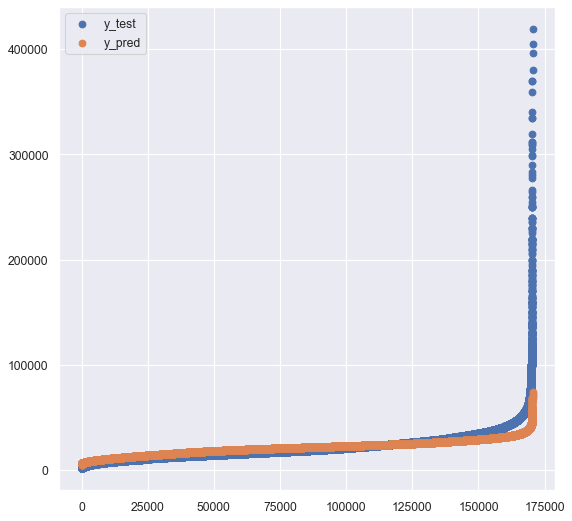

In [311]:
import numpy as np
import matplotlib.pyplot as plt

x = x = np.arange(170425)
y1 = list(y_test)
y1.sort()

y2 = list(y_pred)
y2.sort()

plt.figure(figsize=(8, 8), dpi=80)
Pplot = plt.scatter(x,y1)
Tplot = plt.scatter(x,y2)
plt.legend(handles=[Pplot,Tplot],labels=['y_test','y_pred'])
plt.show()

In [312]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgdr = SGDRegressor()
print(sgdr)
sgdr.fit(X_train, y_train)
y_pred = sgdr.predict(X_test)
score = sgdr.score(X_train, y_train)
print("R-squared:", score)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

SGDRegressor()
R-squared: -6.0471926511640174e+26
MSE:  1.1134641680980912e+35
RMSE:  3.3368610520938554e+17


In [313]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))


0.8294230246609419


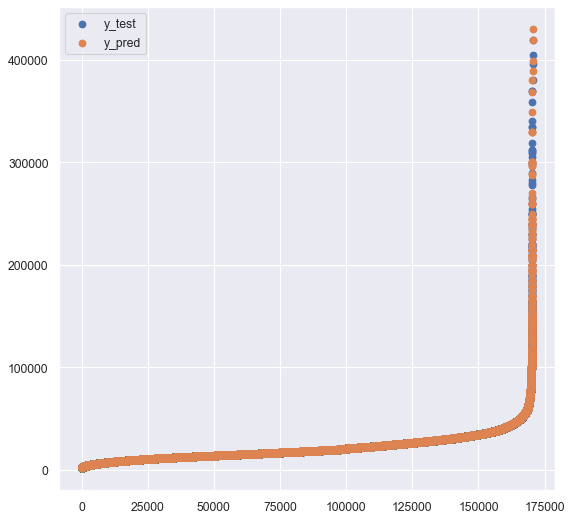

In [314]:

import matplotlib.pyplot as plt

x = x = np.arange(170425)
y1 = list(y_test)
y1.sort()

y2 = list(y_pred)
y2.sort()

plt.figure(figsize=(8, 8), dpi=80)
Pplot = plt.scatter(x,y1)
Tplot = plt.scatter(x,y2)
plt.legend(handles=[Pplot,Tplot],labels=['y_test','y_pred'])
plt.show()

In [ ]:
KNeighborsRegressor(...)
print('KNeighborsRegressor:    ', knn.predict([['2016', '25000', '646', '49', '1', '1196']]))

CatBoostRegressor()
print('CatBoostRegressor model:   ', model.predict([['2016', '25000', '646', '49', '1', '1196']]))
tree.DecisionTreeRegressor()
print('DecisionTreeRegressor model:    ', clf.predict([['2016', '25000', '646', '49', '1', '1196']]))